# Предобработка

In [ ]:
import pandas as pd
import polars as pl
import shap
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, skPipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    average_precision_score
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline, Pipeline as imbPipeline

import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/study/data/final_table.parquet')
# df = pd.read_parquet('/content/drive/MyDrive/mephi_ml/Hack/final_table.parquet')
df = pd.read_parquet('./final_table-3.parquet')

In [4]:
df[df["device_browser"]=="other"]

,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_screen_resolution,...,main_to_catalog,multiple_sms_errors,unique_pages,used_filters,viewed_pricing,retry_attempts,avg_time_between_actions,error_ratio,pagination_clicks,target
2812,236032688.1638537115,2021-12-03,16:11:55,1,QxAxdyPLuQMEcrdZWdWb,paid_traffic,None,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,2000x2000,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
3279,236510205.1634593101,2021-10-19,00:00:00,1,QxAxdyPLuQMEcrdZWdWb,paid_traffic,vAUKqgVpFlghMFvCyBIl,None,None,2000x2000,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
4292,237666955.1632559935,2021-09-25,11:00:00,1,RmEBuqrriAfAVsLQQmhk,paid_traffic,VBmazutCflYumtDHrQYe,JNHcPlZPxEMWDnRiyoBf,None,393x786,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
4731,238230334.1634593653,2021-10-19,00:00:00,1,QxAxdyPLuQMEcrdZWdWb,paid_traffic,qwXNqUOhqrtaEJcARSvk,None,None,2000x2000,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
4847,238372160.1636731191,2021-11-12,18:33:11,1,MvfHsxITijuriZxsqZqt,paid_traffic,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,rUCkqFnIxCaJcjmMyyMC,360x640,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726949,228990042.1640700966,2021-12-28,17:23:16,1,TxKUcPpthBDPieTGmVhx,paid_traffic,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,1024x984,...,0.0,0.0,1,0,0,0,0.1696,0.0,0,0
1728028,230195820.1634576044,2021-10-18,19:00:00,1,QxAxdyPLuQMEcrdZWdWb,paid_traffic,FhMPkFqqAboknIypeYDz,None,None,2000x2000,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
1729828,232239657.1634807929,2021-10-21,12:00:00,1,QxAxdyPLuQMEcrdZWdWb,paid_traffic,MXDkcHqcdXtujYTeSiOo,None,None,2000x2000,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0
1730088,232485577.1640205417,2021-12-22,23:37:01,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,800x600,...,0.0,0.0,1,0,0,0,0.0000,0.0,0,0


In [5]:
null_counts = df.isnull().sum()
print("Количество пустых значений:\n", null_counts)

Количество пустых значений:
 client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                        0
utm_medium                        0
utm_campaign                 208910
utm_adcontent                318489
utm_keyword                 1010101
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
is_holiday                        0
season                            0
is_mobile                         0
is_million                        0
session_duration            1079462
traffic_type_cat                  0
catalog_visits                    0
total_actions                     0
form_interactions                 0
is_evening                        0
main_to_catalog             1520908
multiple_sms_errors               0
unique_pages                      0
used_filters                      0

In [ ]:
# Дропаем признаки, так как в них есть пустые значения
df = df.drop(columns=["main_to_catalog", "session_duration", "utm_keyword", "utm_campaign", "utm_adcontent"])

In [7]:
def process_screen_resolution(df):
    # Разделение на ширину и высоту
    df[['screen_width', 'screen_height']] = df['device_screen_resolution'].str.split('x', expand=True)
    
    # Преобразование в числа
    df['screen_width'] = pd.to_numeric(df['screen_width'], errors='coerce')
    df['screen_height'] = pd.to_numeric(df['screen_height'], errors='coerce')
    
    # Удаление оригинального признака
    df.drop(columns=['device_screen_resolution'], inplace=True)
    
    return df

# Обработка данных
df = process_screen_resolution(df.copy())

# Проверка
print(df[['screen_width', 'screen_height']].dtypes)
print(len(df))
df = df.dropna()
print(len(df))

screen_width     float64
screen_height    float64
dtype: object
1730384
1730377


In [8]:
df[["traffic_type_cat"]]

,traffic_type_cat
0,organic
1,paid
2,paid
3,organic
4,organic
...,...
1730379,paid
1730380,paid
1730381,organic
1730382,paid


In [9]:
# Разделение на признаки и целевую переменную
X = df.drop(columns=["client_id", "visit_date", "visit_time", "target"])
y = df["target"]

# Разделение на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [10]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [14]:
df.utm_medium.unique()

array(['(none)', 'paid_traffic', 'organic', 'referral'], dtype=object)

# Обучение

## Бейзлайн

In [15]:
def plot_learning_curve(model, X, y):
    # Вычисляем метрику (ROC-AUC) на разных размерах обучающей выборки
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)  # 10 точек от 10% до 100% данных
    )

    # Средние значения метрик
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Train ROC-AUC")
    plt.plot(train_sizes, test_scores_mean, label="Test ROC-AUC")
    plt.xlabel("Training examples")
    plt.ylabel("ROC-AUC")
    plt.title("Learning Curve (Baseline)")
    plt.legend()
    plt.grid()
    plt.show()

In [16]:
df[df["target"] == 0]["target"].count()

1704318

In [17]:
df[df["target"] == 1]["target"].count()

26059

In [18]:
# Определение категориальных и числовых признаков
categorical_features = [
    #"utm_source_encoded", расскоментить в том случае, если расскоменчен энкодер в ячейке выше
    "utm_source",
    "utm_medium",
    # "utm_campaign", дроп
    # "utm_adcontent", дроп
    # "utm_keyword", дроп
    "device_browser",
    "geo_country",
    "traffic_type_cat",
    "geo_city"
]
numeric_features = [
    "visit_number",
    # "session_duration", дроп
    "catalog_visits",
    "total_actions",
    "form_interactions",
    "unique_pages",
    "avg_time_between_actions",
    "error_ratio",
    "pagination_clicks",
    "retry_attempts",
    "screen_width",
    "screen_height"
]
binary_features = [
    "is_holiday",
    "is_mobile",
    "is_million",
    "is_evening",
    # "main_to_catalog", дроп
    "multiple_sms_errors",
    "used_filters",
    "viewed_pricing"
]
low_cardinality = ["utm_medium", "traffic_type_cat", "device_browser", "geo_country"]
high_cardinality = ["utm_source"]

In [ ]:
# Пайплайн для обработки
preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
        ("high_card", TargetEncoder(), high_cardinality),
        ("num", StandardScaler(), numeric_features),  # Числовые признаки
        ("bin", "passthrough", binary_features)        # Бинарные признаки
    ]
)

# Модель
model_baseline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Обучение
model_baseline.fit(X_train, y_train)

# Предикт и метрики
y_pred_proba_baseline = model_baseline.predict_proba(X_test)[:, 1]

plot_learning_curve(model_baseline, X_train, y_train)

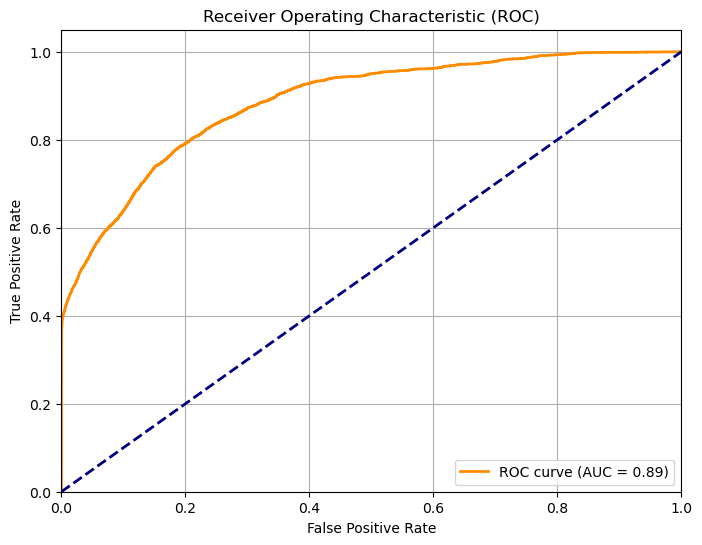

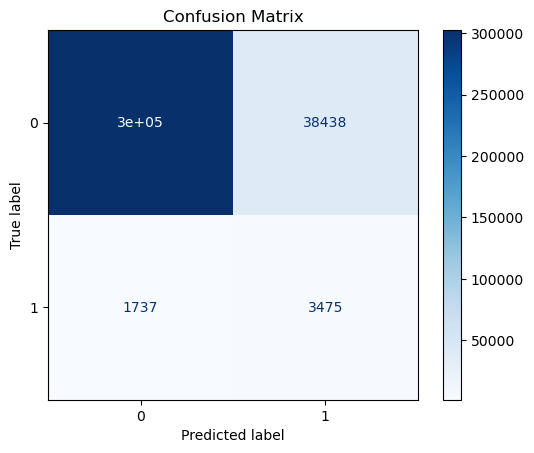

In [20]:
# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_baseline)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Матрица ошибок
y_pred = (y_pred_proba_baseline > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Оптимизация

### LGBM

#### Обучение

In [ ]:
# Препроцессинг
low_cardinality = ["utm_medium", "traffic_type_cat", "device_browser", "geo_country", "geo_city"]
high_cardinality = ["utm_source"]

preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
        ("high_card", TargetEncoder(), high_cardinality),
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

# Целевая функция Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 10.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 57.0, 68.0)
    }

    model = imbpipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", LGBMClassifier(**params, random_state=42, verbose=-1))
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []
    cv_scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
        model.fit(X_tr, y_tr)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        pr_auc = average_precision_score(y_val, y_pred_proba)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Логирование метрик
        trial.set_user_attr("roc_auc", roc_auc)
        trial.set_user_attr("pr_auc", pr_auc)
        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("f1", f1)
        trial.set_user_attr("f1", f1)
        
        f1_scores.append(f1)
        cv_scores.append(roc_auc)

    return -np.mean(f1_scores)

from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0, 1, 100)
    best_f1 = 0
    best_threshold = 0.5
    for t in thresholds:
        y_pred = (y_proba > t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    return best_threshold

# Запуск Optuna
study_lgbm = optuna.create_study(direction="minimize")
study_lgbm.optimize(objective, n_trials=12)

# Лучшая модель
best_params_lgbm = study_lgbm.best_params
model_optimized_lgbm = imbpipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1))
])
model_optimized_lgbm.fit(X_train, y_train)

# Подбор порога
y_proba_lgbm = model_optimized_lgbm.predict_proba(X_test)[:, 1]
optimal_threshold = find_optimal_threshold(y_test, y_proba_lgbm)
y_pred_lgbm = (y_proba_lgbm > optimal_threshold).astype(int)

# Вывод метрик
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_lgbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm):.4f}")
print(f"F1: {f1_score(y_test, y_pred_lgbm):.4f}")

# Визуализации
fig = plot_optimization_history(study_lgbm)
fig.show()

fig = plot_param_importances(study_lgbm)
fig.show()

[I 2025-05-06 02:15:41,280] A new study created in memory with name: no-name-544a17aa-2909-485e-ad06-f109a99e7c7c
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-06 02:16:57,975] Trial 0 finished with value: -0.08777928806802403 and parameters: {'n_estimators': 463, 'max_depth': 4, 'learning_rate': 0.13314540150965326, 'num_leaves': 57, 'min_data_in_leaf': 37, 'lambda_l1': 4.748690403999286, 'lambda_l2': 1.

ROC-AUC: 0.9379
PR-AUC: 0.5197
Precision: 0.1658
Recall: 0.6596
F1: 0.2650


In [139]:
import joblib

# Сохранение модели
joblib.dump(model_optimized_lgbm, './models/lgbm_model.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold, './models/lgbm_threshold.joblib')

['./models/lgbm_threshold.joblib']

In [140]:
# Загрузка модели
loaded_model = joblib.load('./models/lgbm_model.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/lgbm_threshold.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [23]:
print("sleep 2 min")
import time
time.sleep(120)

sleep 2 min


#### Визуализации

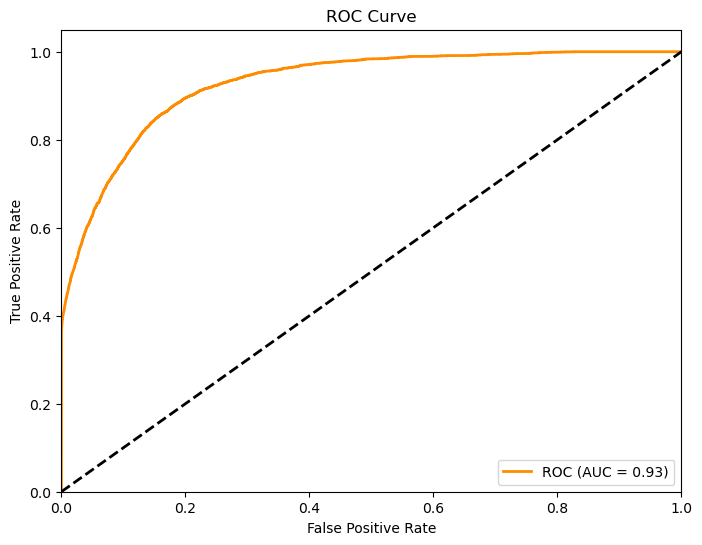

In [141]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lgbm)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

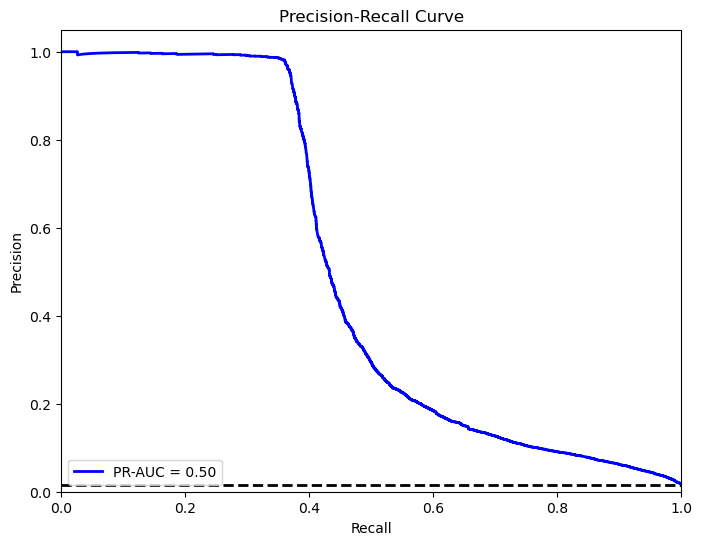

In [142]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lgbm)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

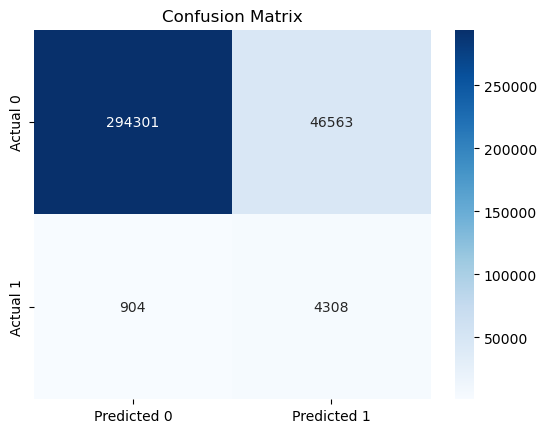

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_lgbm > optimal_threshold).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

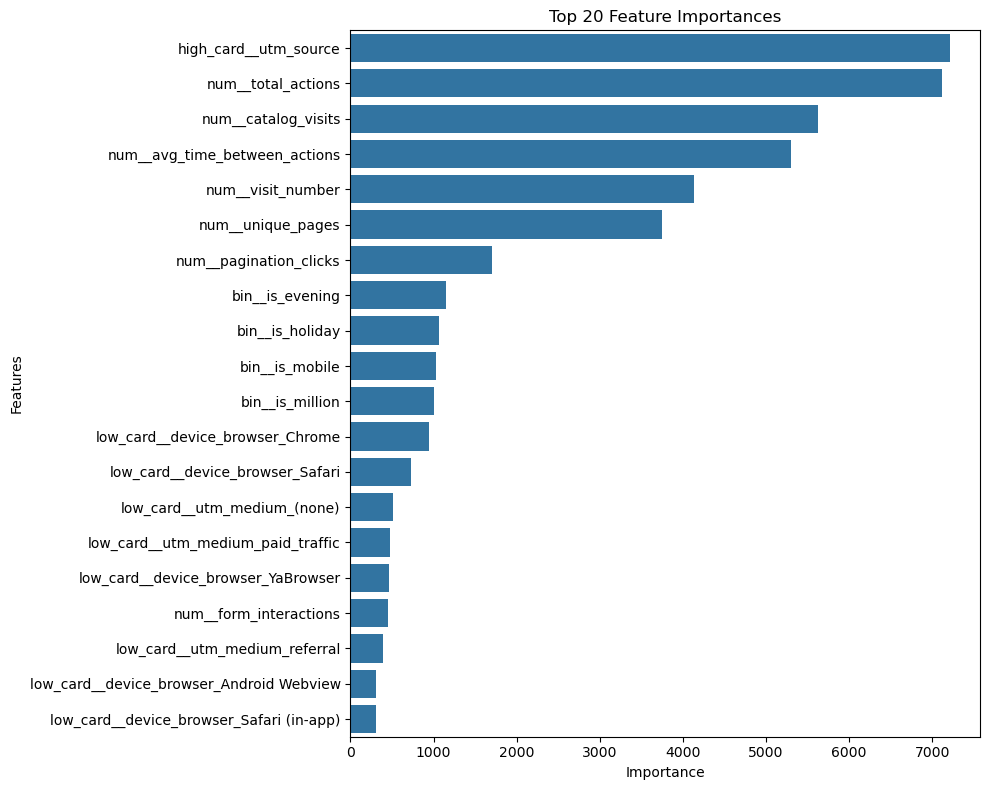

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Получение имен признаков после препроцессинга
feature_names = preprocessor.get_feature_names_out()

# Получение важности признаков из обученной модели
importances = model_optimized_lgbm.named_steps['classifier'].feature_importances_

# Создание DataFrame с важностью признаков
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Визуализация топ-20 самых важных признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier wa

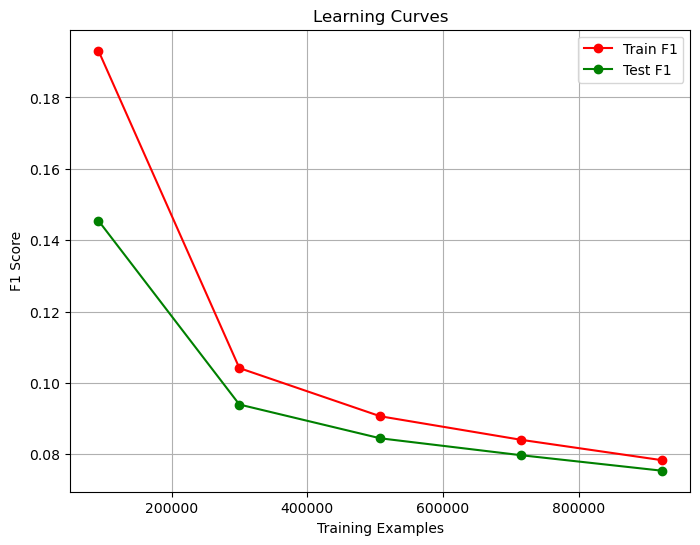

In [145]:
from sklearn.model_selection import learning_curve

# Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    model_optimized_lgbm, X_train, y_train, cv=3, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Средние и стандартные отклонения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Построение
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train F1')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test F1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

In [146]:
import shap

# Используем данные после препроцессинга
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем доступ к обученной модели LGBM (без SMOTE)
model_lgbm = model_optimized_lgbm.named_steps['classifier']
# Создаем объясняющий объект
explainer = shap.TreeExplainer(model_lgbm)

# Вычисляем SHAP-значения для тестовой выборки
shap_values = explainer.shap_values(X_test_processed)

# Если задача бинарной классификации, shap_values будет списком из двух элементов:
# shap_values[0] — для класса 0, shap_values[1] — для класса 1
# Используем второй класс (положительный)
shap_values_class_1 = shap_values[1]

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/shap/explainers/_tree.py:583: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



In [147]:
print("SHAP values shape:", shap_values_class_1.shape)  # Должно быть (n_samples, n_features)
print("X_test shape:", X_test_processed.shape)  

SHAP values shape: (37,)
X_test shape: (346076, 37)


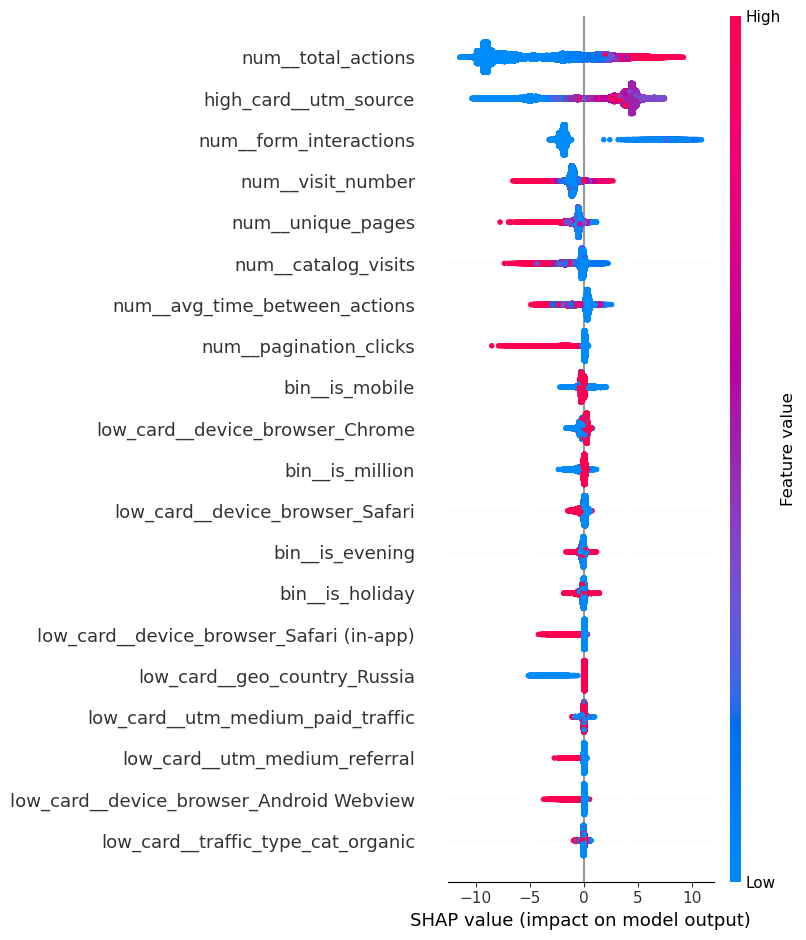

In [148]:
# Глобальная интерпретация: важность признаков (всё тестовое множество)
shap.summary_plot(
    shap_values, 
    X_test_processed, 
    feature_names=preprocessor.get_feature_names_out()
)

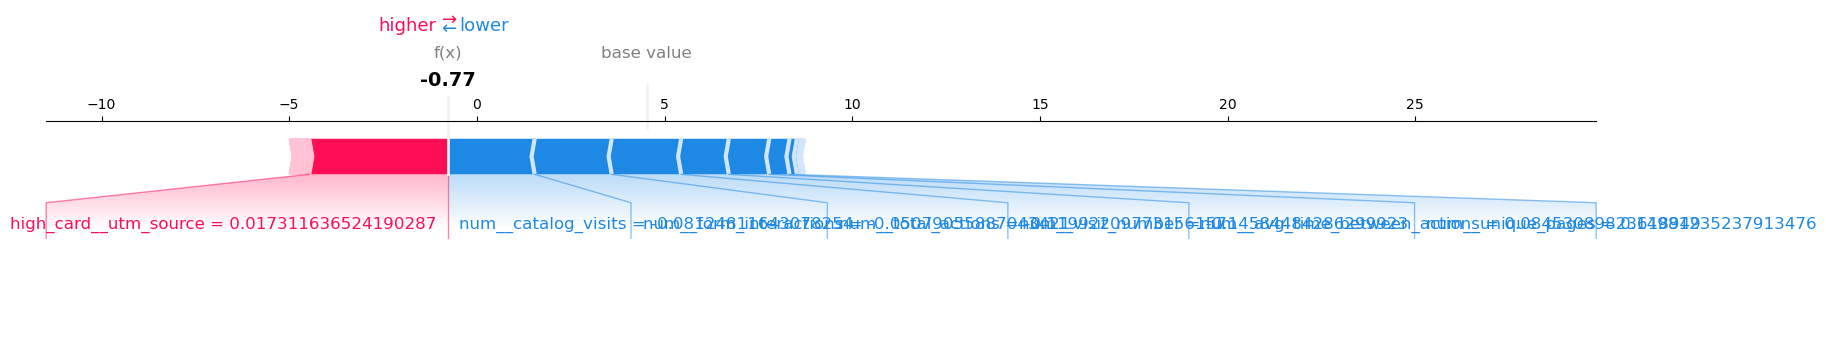

In [149]:
# Локальная интерпретация: влияние признаков на отдельный прогноз (один объект)
idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[idx], 
    X_test_processed[idx], 
    feature_names=preprocessor.get_feature_names_out(),
    matplotlib=True
)

In [150]:
preprocessor.get_feature_names_out()

array(['low_card__utm_medium_(none)', 'low_card__utm_medium_organic',
       'low_card__utm_medium_paid_traffic',
       'low_card__utm_medium_referral',
       'low_card__traffic_type_cat_organic',
       'low_card__traffic_type_cat_paid',
       'low_card__device_browser_Android Webview',
       'low_card__device_browser_Chrome', 'low_card__device_browser_Edge',
       'low_card__device_browser_Firefox',
       'low_card__device_browser_Opera',
       'low_card__device_browser_Safari',
       'low_card__device_browser_Safari (in-app)',
       'low_card__device_browser_Samsung Internet',
       'low_card__device_browser_YaBrowser',
       'low_card__device_browser_other',
       'low_card__geo_country_(not set)', 'low_card__geo_country_Belarus',
       'low_card__geo_country_Ireland', 'low_card__geo_country_Russia',
       'low_card__geo_country_Sweden', 'low_card__geo_country_Ukraine',
       'low_card__geo_country_United States',
       'low_card__geo_country_other', 'high_card__utm

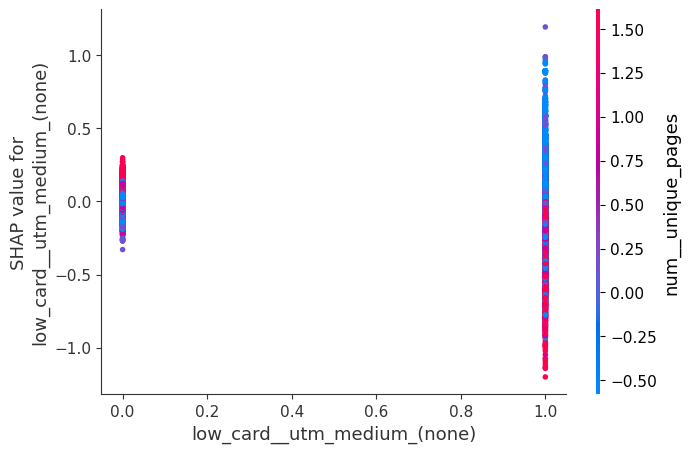

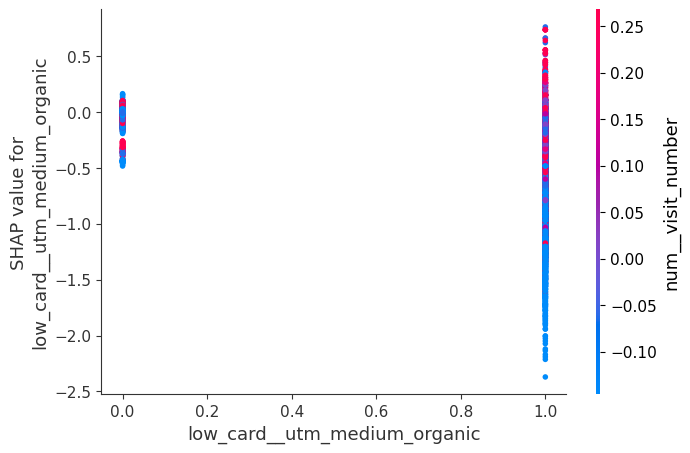

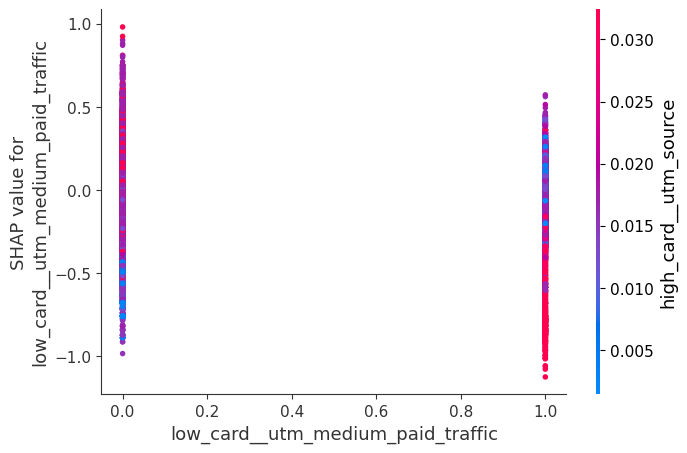

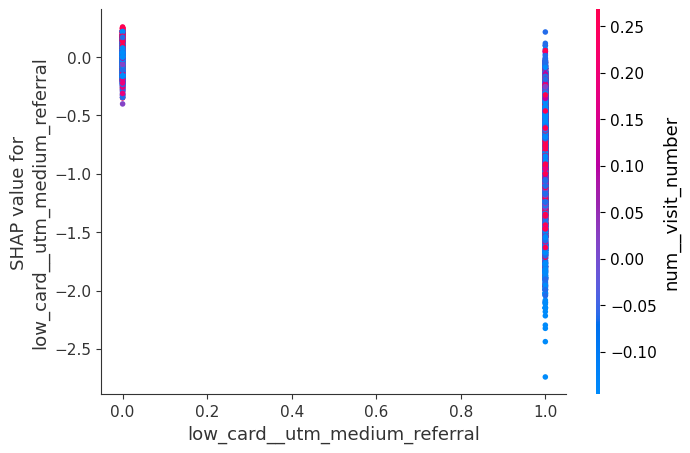

In [151]:
shap.dependence_plot(
    "low_card__utm_medium_(none)",
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_organic',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_paid_traffic',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_referral',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)


### CatBoost

#### Обучение

In [24]:
# Список категориальных признаков
categorical_features = [
    "utm_source", "utm_medium",
    "device_browser", "geo_country", "geo_city", "traffic_type_cat"
]
print(X_train[categorical_features].dtypes)

utm_source          object
utm_medium          object
device_browser      object
geo_country         object
geo_city            object
traffic_type_cat    object
dtype: object


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
import optuna

# Список категориальных признаков
categorical_features = ["utm_source", "utm_medium", "traffic_type_cat", "device_browser", "geo_country", "geo_city"]

# Функция для Optuna
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 50.0, 100.0),
        "random_state": 42,
        "verbose": False,
        "cat_features": categorical_features  # Важно!
    }

    model = CatBoostClassifier(**params)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=50)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)

        # Логирование метрик
        trial.set_user_attr("roc_auc", roc_auc_score(y_val, y_pred_proba))
        trial.set_user_attr("f1", f1_score(y_val, y_pred))

        f1_scores.append(f1_score(y_val, y_pred))

    return -np.mean(f1_scores)

# Запуск Optuna
study_catboost = optuna.create_study(direction="minimize")
study_catboost.optimize(objective, n_trials=30)

# Обучение лучшей модели
best_params_catboost = study_catboost.best_params
best_model_catboost = CatBoostClassifier(**best_params_catboost, cat_features=categorical_features, verbose=False)
best_model_catboost.fit(X_train, y_train)

# Оценка
y_proba_catboost = best_model_catboost.predict_proba(X_test)[:, 1]
optimal_threshold_catboost = find_optimal_threshold(y_test, y_proba_catboost)
y_pred_catboost = (y_proba_catboost > optimal_threshold_catboost).astype(int)

# Вывод метрик
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_catboost):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_catboost):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_catboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost):.4f}")
print(f"F1: {f1_score(y_test, y_pred_catboost):.4f}")

# 7. Визуализации
fig = plot_optimization_history(study_catboost)
fig.show()

fig = plot_param_importances(study_catboost)
fig.show()

[I 2025-05-06 02:52:16,818] A new study created in memory with name: no-name-2a443721-1d78-4f2d-9f08-1feb33354ef2
[I 2025-05-06 02:54:14,876] Trial 0 finished with value: -0.1584692396905732 and parameters: {'iterations': 444, 'depth': 7, 'learning_rate': 0.21845425456360168, 'l2_leaf_reg': 3.5064731954490878, 'border_count': 179, 'scale_pos_weight': 79.25679102079364}. Best is trial 0 with value: -0.1584692396905732.
[I 2025-05-06 02:55:21,788] Trial 1 finished with value: -0.14796310705131896 and parameters: {'iterations': 143, 'depth': 10, 'learning_rate': 0.09772336151291858, 'l2_leaf_reg': 1.985032562401727, 'border_count': 92, 'scale_pos_weight': 92.42727564478398}. Best is trial 0 with value: -0.1584692396905732.
[I 2025-05-06 02:57:26,856] Trial 2 finished with value: -0.18143830429757388 and parameters: {'iterations': 493, 'depth': 7, 'learning_rate': 0.22554946280687913, 'l2_leaf_reg': 4.387597650376684, 'border_count': 92, 'scale_pos_weight': 58.31924861716241}. Best is tria

ROC-AUC: 0.9510
PR-AUC: 0.5654
Precision: 0.9595
Recall: 0.4140
F1: 0.5785


#### Визуализации

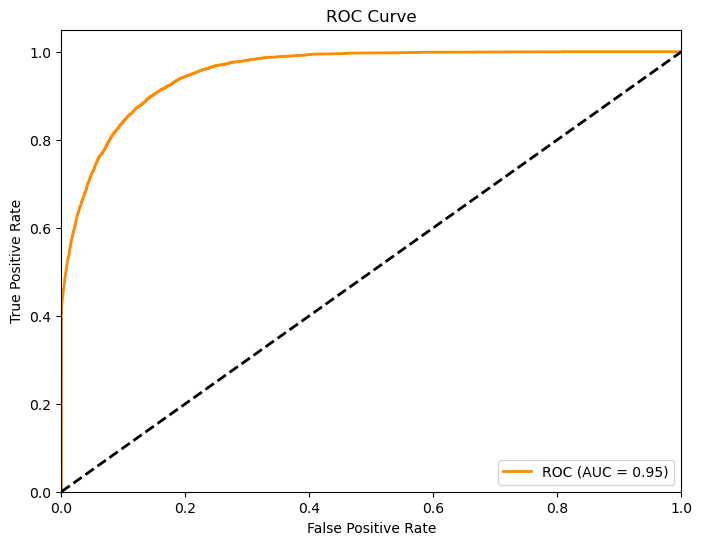

In [ ]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_catboost)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

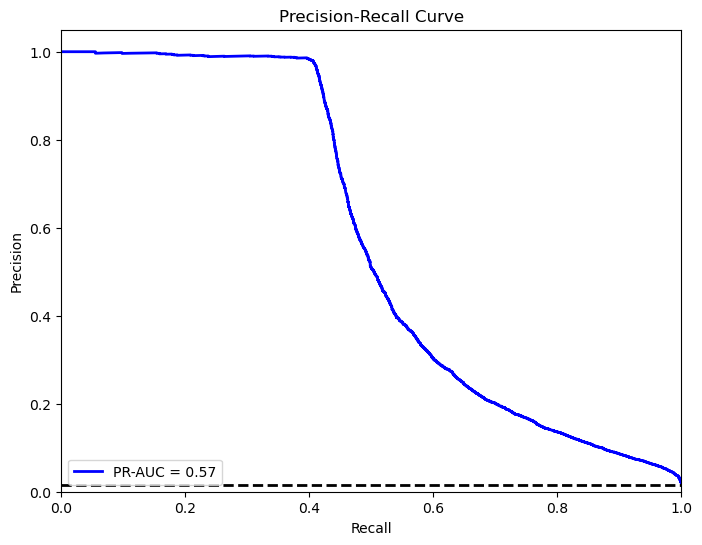

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_catboost)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

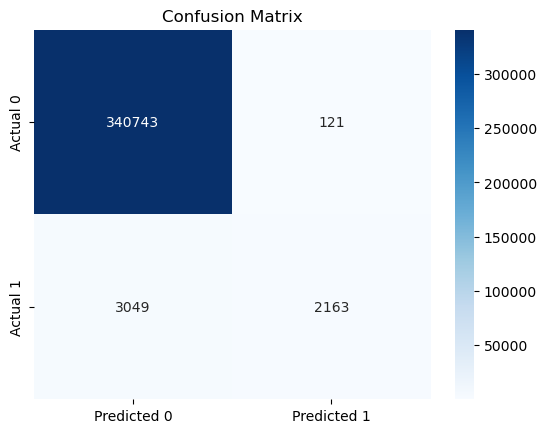

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_catboost > optimal_threshold_catboost).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

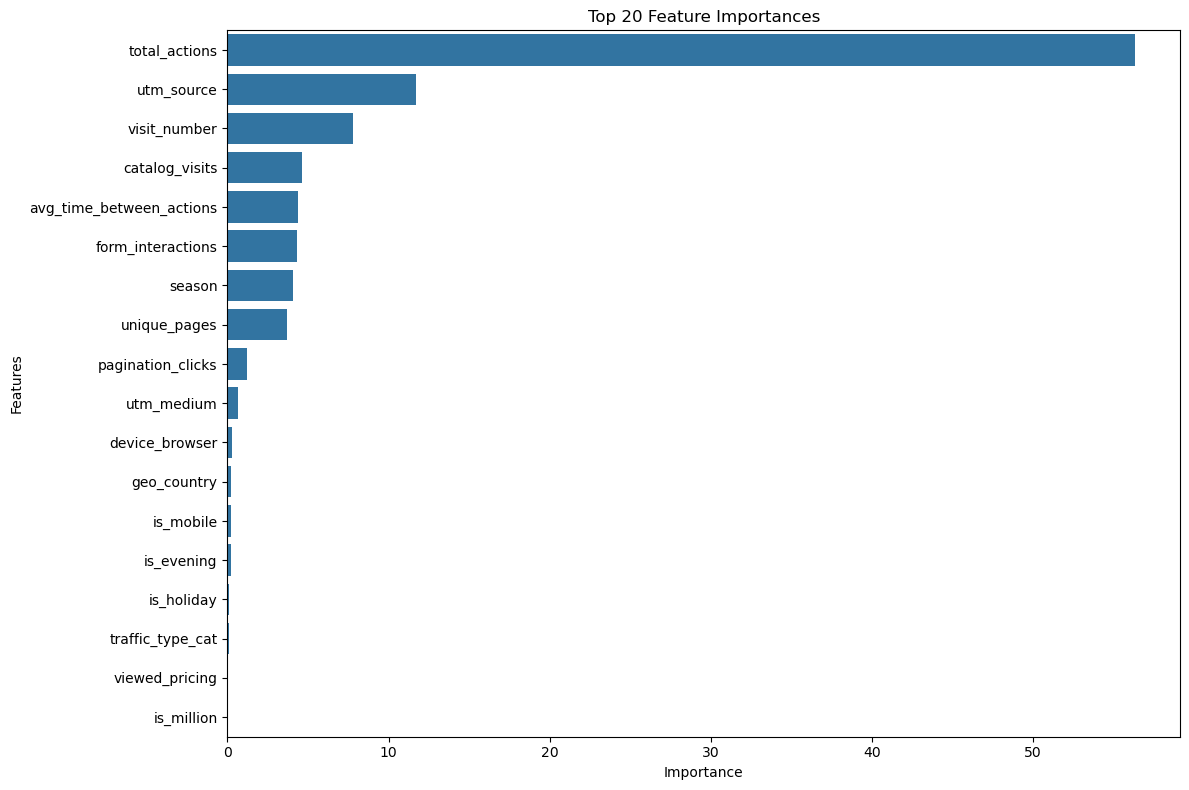

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Получаем важность признаков из обученной модели
feature_importance = best_model_catboost.get_feature_importance()
feature_names = X_train.columns

# Создаем DataFrame для визуализации
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Сортируем по важности и берем топ-20 признаков
top_features = feature_df.sort_values('importance', ascending=False).head(20)

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

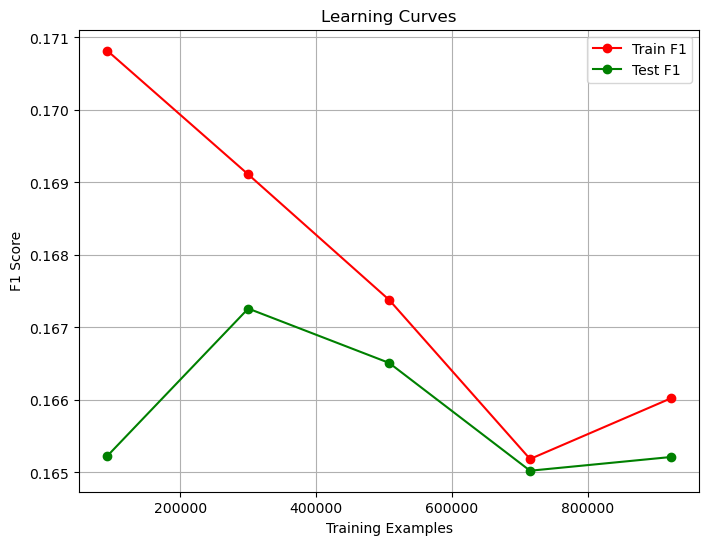

In [ ]:
# Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    best_model_catboost, X_train, y_train, cv=3, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Средние и стандартные отклонения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Построение
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train F1')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test F1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 1. Подготовка данных
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# 2. Получаем модель напрямую (без named_steps)
model_catboost = best_model_catboost

# 3. Инициализируем SHAP-объяснитель
explainer = shap.TreeExplainer(model_catboost)

# 4. Вычисляем SHAP-значения
shap_values = explainer.shap_values(X_test_processed)
shap_values_class_1 = shap_values[1]  # Для положительного класса (если задача бинарной классификации)

In [ ]:
print("SHAP values shape:", shap_values_class_1.shape)  # Должно быть (n_samples, n_features)
print("X_test shape:", X_test_processed.shape)  

SHAP values shape: (18,)
X_test shape: (346076, 18)


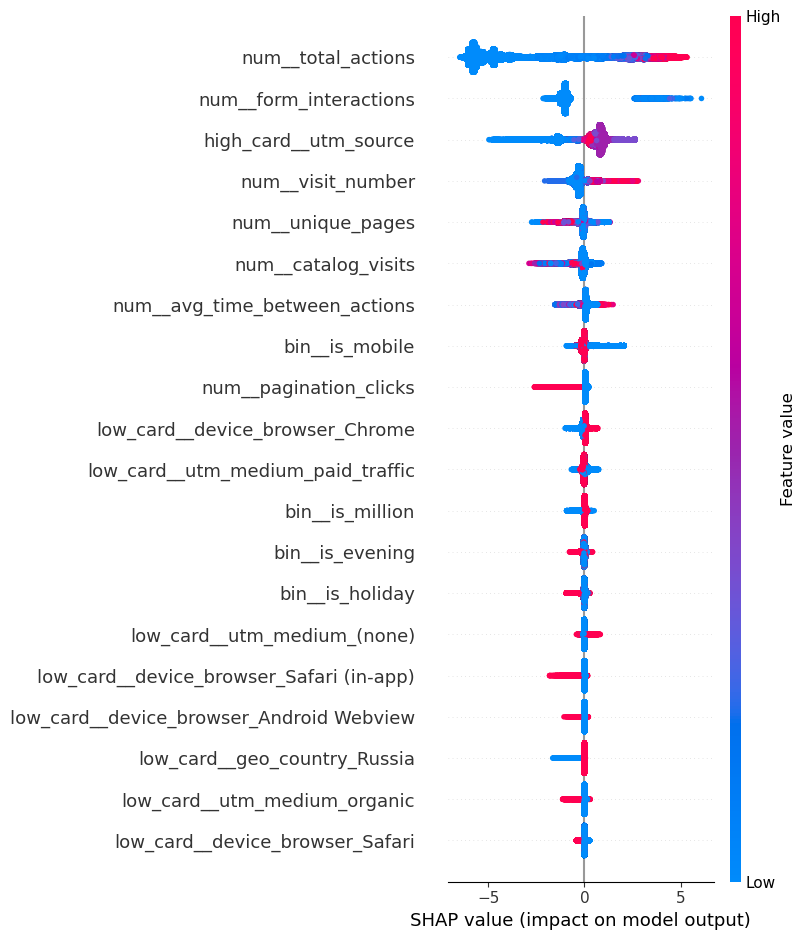

In [ ]:
# Глобальная интерпретация: важность признаков (всё тестовое множество)
shap.summary_plot(
    shap_values, 
    X_test_processed, 
    feature_names=preprocessor.get_feature_names_out()
)

In [ ]:
X_test_processed.iloc[0]

visit_number                                   1
utm_source                  ZpYIoDJMcFzVoPFsHGJL
utm_medium                          paid_traffic
device_browser                            Chrome
geo_country                               Russia
is_holiday                                     0
season                                         3
is_mobile                                      1
is_million                                     1
traffic_type_cat                            paid
catalog_visits                                 8
total_actions                                 64
form_interactions                              0
is_evening                                     0
unique_pages                                   2
viewed_pricing                                 0
avg_time_between_actions               10.601714
pagination_clicks                              0
Name: 714548, dtype: object

In [ ]:
X_test_processed.columns

Index(['visit_number', 'utm_source', 'utm_medium', 'device_browser',
       'geo_country', 'is_holiday', 'season', 'is_mobile', 'is_million',
       'traffic_type_cat', 'catalog_visits', 'total_actions',
       'form_interactions', 'is_evening', 'unique_pages', 'viewed_pricing',
       'avg_time_between_actions', 'pagination_clicks'],
      dtype='object')

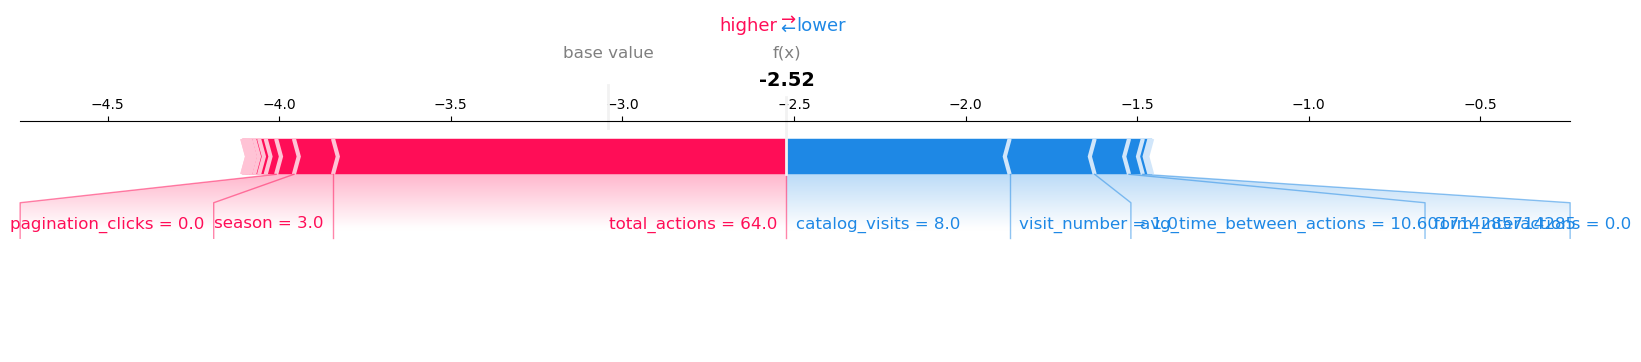

In [ ]:
# Локальная интерпретация: влияние признаков на отдельный прогноз (один объект)
idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[idx], 
    X_test_processed.iloc[idx], 
    feature_names=X_test_processed.columns,
    matplotlib=True
)

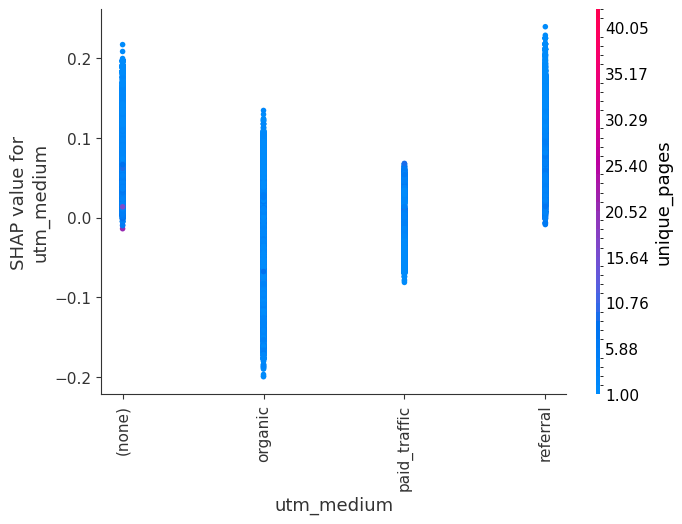

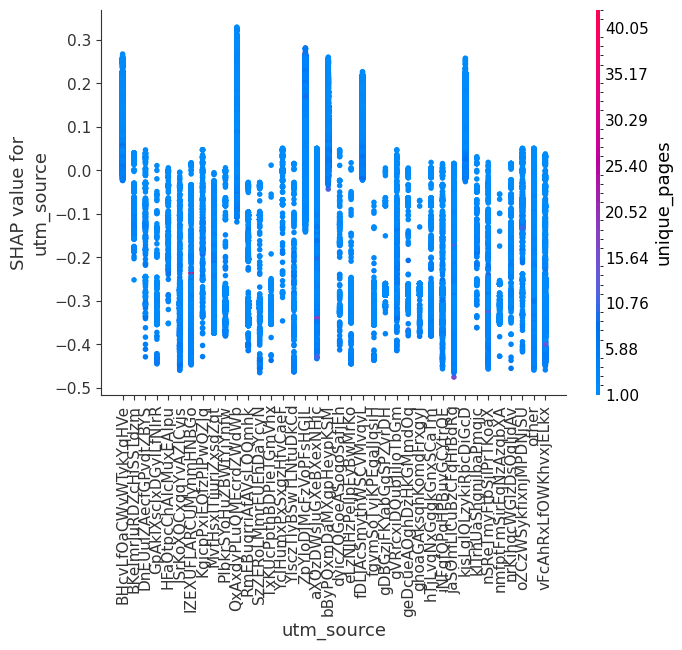

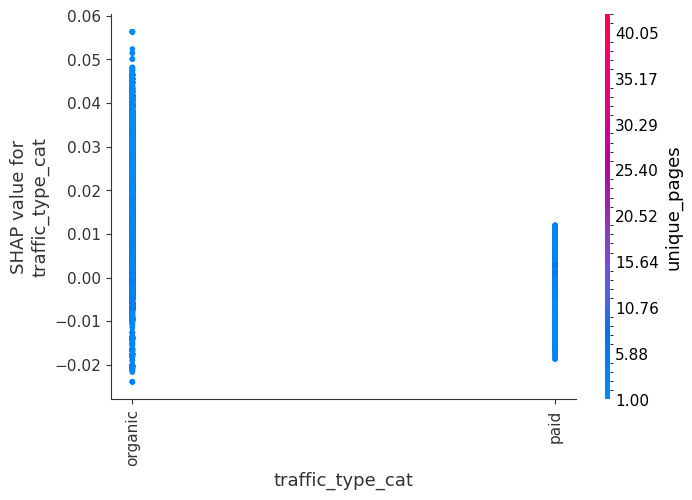

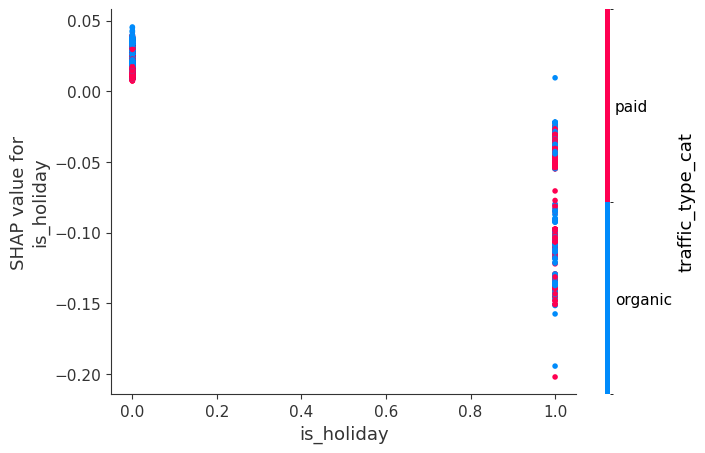

In [ ]:
shap.dependence_plot(
    "utm_medium",
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    "utm_source",
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    'traffic_type_cat',
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    'is_holiday',
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)


In [26]:
print("sleep 2 min")
import time
time.sleep(120)

sleep 2 min


### XGBoost

In [27]:
low_cardinality = ["utm_medium", "traffic_type_cat", "device_browser", "geo_country"]
high_cardinality = ["utm_source"]
numeric_features = numeric_features
binary_features = binary_features

# 1. Препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
        ("high_card", TargetEncoder(), high_cardinality),
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 50.0, 100.0),
        "eval_metric": "logloss",
        "random_state": 42
    }

    # Инициализация модели
    model = imbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", XGBClassifier(**params, early_stopping_rounds=50))
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

        # Примените препроцессинг и SMOTE вручную
        # 1. Обучение препроцессора на обучающей части
        X_tr_processed = model.named_steps.preprocessor.fit_transform(X_tr, y_tr)
        X_val_processed = model.named_steps.preprocessor.transform(X_val)
        

        # 2. Балансировка данных
        X_res, y_res = model.named_steps.smote.fit_resample(X_tr_processed, y_tr)

        # 3. Обучение XGBoost с early_stopping_rounds
        model.named_steps.classifier.fit(
            X_res, y_res,
            eval_set=[(X_val_processed, y_val)],
            verbose=False
        )

        # Оценка
        y_pred_proba = model.named_steps.classifier.predict_proba(X_val_processed)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)

        trial.set_user_attr("roc_auc", roc_auc_score(y_val, y_pred_proba))
        trial.set_user_attr("f1", f1_score(y_val, y_pred))

        f1_scores.append(f1_score(y_val, y_pred))

    return -np.mean(f1_scores)

# 3. Подбор порога классификации
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0, 1, 100)
    best_f1 = 0
    best_threshold = 0.5
    for t in thresholds:
        y_pred = (y_proba > t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    return best_threshold

# 4. Загрузка данных (пример)
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 5. Запуск Optuna
study_xgboost = optuna.create_study(direction="minimize")
study_xgboost.optimize(objective, n_trials=30)

# 6. Лучшая модель
best_params_xgboost = study_xgboost.best_params
best_model_xgboost = imbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(**best_params_xgboost, eval_metric="logloss", early_stopping_rounds=50))
])

# 7. Обучение на полном датасете с ранней остановкой
# Разделение на обучающую и валидационную части
X_train_main, X_train_val, y_train_main, y_train_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Примените препроцессинг
X_train_processed = best_model_xgboost.named_steps.preprocessor.fit_transform(X_train_main, y_train_main)
X_val_processed = best_model_xgboost.named_steps.preprocessor.transform(X_train_val)

# Примените SMOTE
X_res, y_res = best_model_xgboost.named_steps.smote.fit_resample(X_train_processed, y_train_main)

# Обучение модели с ранней остановкой
best_model_xgboost.named_steps.classifier.fit(
    X_res, y_res,
    eval_set=[(X_val_processed, y_train_val)],
    verbose=False
)

# 8. Оценка модели
y_proba_xgboost = best_model_xgboost.predict_proba(X_test)[:, 1]
optimal_threshold_xgboost = find_optimal_threshold(y_test, y_proba_xgboost)
y_pred_xgboost = (y_proba_xgboost > optimal_threshold_xgboost).astype(int)

# Вывод метрик
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_xgboost):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_xgboost):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgboost):.4f}")
print(f"F1: {f1_score(y_test, y_pred_xgboost):.4f}")

[I 2025-05-06 03:58:11,975] A new study created in memory with name: no-name-1a421106-bf7e-4f68-9e29-e964a00a20a1
[I 2025-05-06 03:58:35,482] Trial 0 finished with value: -0.1037483675363785 and parameters: {'n_estimators': 113, 'max_depth': 10, 'learning_rate': 0.25349483405539897, 'subsample': 0.6487934148455099, 'colsample_bytree': 0.7469767613800018, 'reg_alpha': 3.493545086119583, 'reg_lambda': 3.5164166679543447, 'scale_pos_weight': 50.61562290074923}. Best is trial 0 with value: -0.1037483675363785.
[I 2025-05-06 03:59:15,247] Trial 1 finished with value: -0.08846700884401971 and parameters: {'n_estimators': 406, 'max_depth': 8, 'learning_rate': 0.06120230317809059, 'subsample': 0.7269752581234485, 'colsample_bytree': 0.9185977375220808, 'reg_alpha': 9.679656685358433, 'reg_lambda': 2.1391322827665507, 'scale_pos_weight': 85.99322803533329}. Best is trial 0 with value: -0.1037483675363785.
[I 2025-05-06 03:59:40,716] Trial 2 finished with value: -0.09380463325594622 and paramete

ROC-AUC: 0.9447
PR-AUC: 0.5203
Precision: 0.2391
Recall: 0.5627
F1: 0.3356


In [153]:
import joblib

# Сохранение модели
joblib.dump(best_model_xgboost, './models/xgboost_model.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold_xgboost, './models/xgboost_threshold.joblib')

['./models/xgboost_threshold.joblib']

In [154]:
# Загрузка модели
loaded_model = joblib.load('./models/xgboost_model.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/xgboost_threshold.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

#### Визуализации

In [180]:
# Визуализации
fig = plot_optimization_history(study_xgboost)
fig.show()

fig = plot_param_importances(study_xgboost)
fig.show()

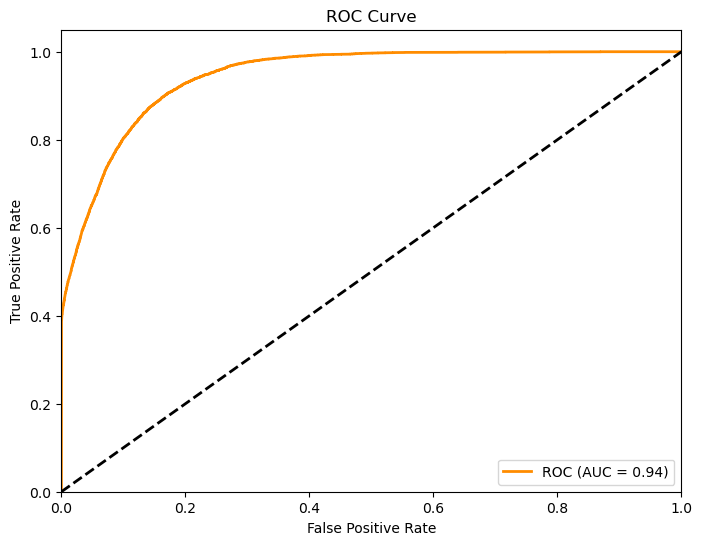

In [156]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgboost)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

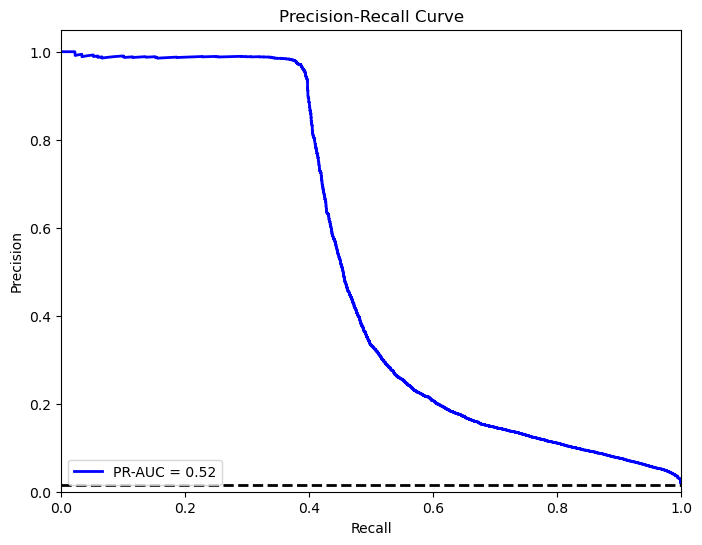

In [157]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_xgboost)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

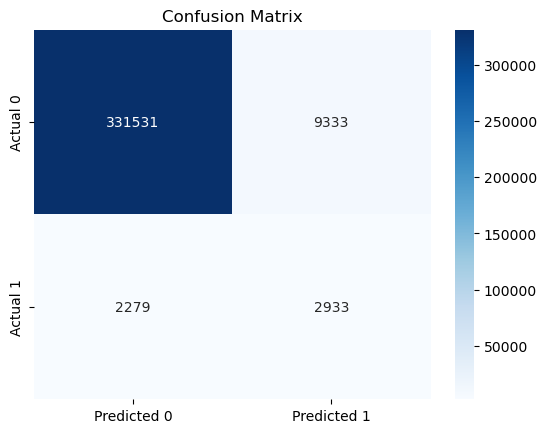

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_xgboost > optimal_threshold_xgboost).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

### Голосование

In [28]:
low_cardinality = ["utm_medium", "traffic_type_cat", "device_browser", "geo_country"]
high_cardinality = ["utm_source"]
numeric_features = numeric_features
binary_features = binary_features

# Препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
        ("high_card", TargetEncoder(), high_cardinality),
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

# Пайплайны для каждой модели
lgbm_pipeline = imbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1))
])

xgb_pipeline = imbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(**best_params_xgboost, eval_metric="logloss"))
])

catboost_pipeline = imbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", CatBoostClassifier(**best_params_catboost, verbose=False))
])

# Голосование
voting_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_pipeline),
        ('xgb', xgb_pipeline),
        ('catboost', catboost_pipeline)
    ],
    voting='soft'
)

# Обучение
voting_model.fit(X_train, y_train)

# Оценка
y_proba_voting = voting_model.predict_proba(X_test)[:, 1]
optimal_threshold_voting = find_optimal_threshold(y_test, y_proba_voting)
y_pred_voting = (y_proba_voting > optimal_threshold_voting).astype(int)

print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_voting):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_voting):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_voting):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_voting):.4f}")
print(f"F1: {f1_score(y_test, y_pred_voting):.4f}")

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



ROC-AUC: 0.9410
PR-AUC: 0.5227
Precision: 0.1779
Recall: 0.6395
F1: 0.2784


In [167]:
import joblib

# Сохранение модели
joblib.dump(voting_model, './models/voting_model.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold_voting, './models/voting_threshold.joblib')

['./models/voting_threshold.joblib']

In [168]:
# Загрузка модели
loaded_model = joblib.load('./models/voting_model.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/voting_threshold.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

#### Визуализации

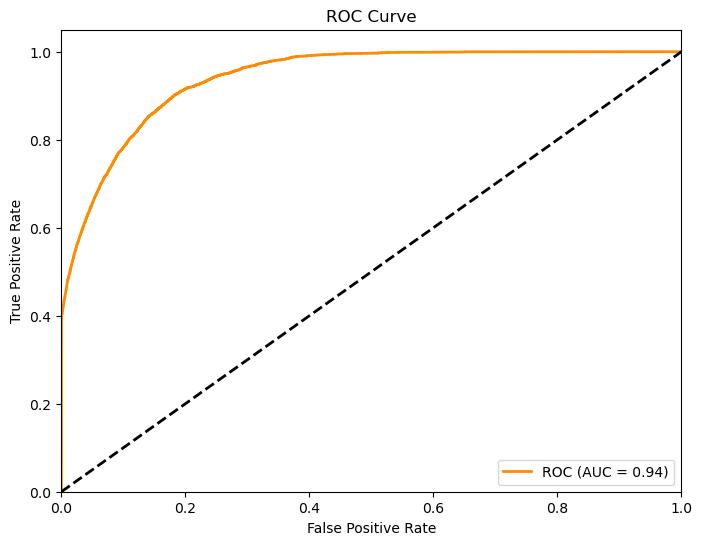

In [169]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_voting)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

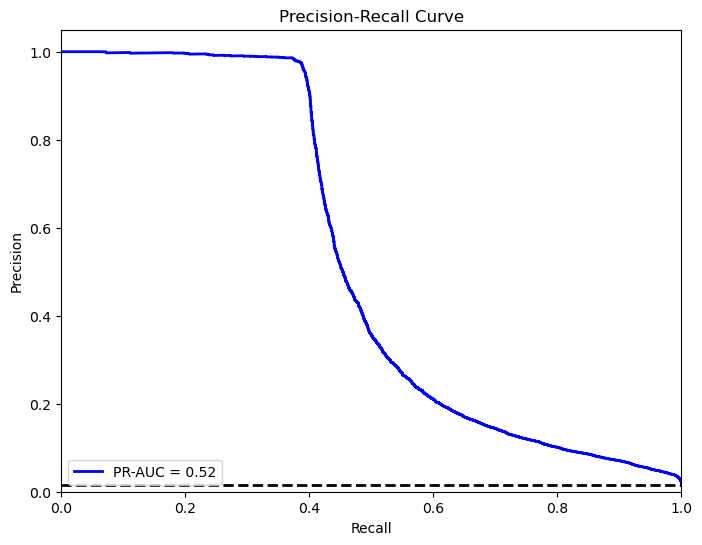

In [170]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_voting)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

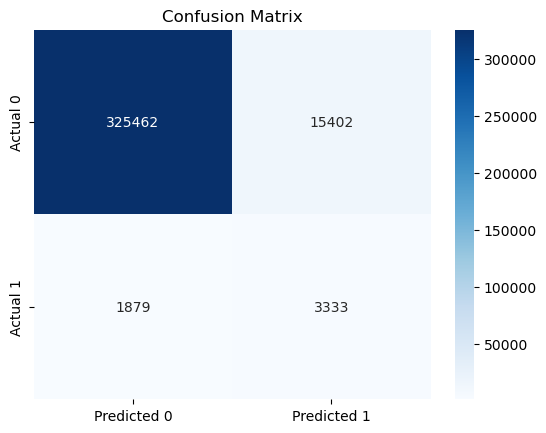

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_voting > optimal_threshold_voting).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier wa

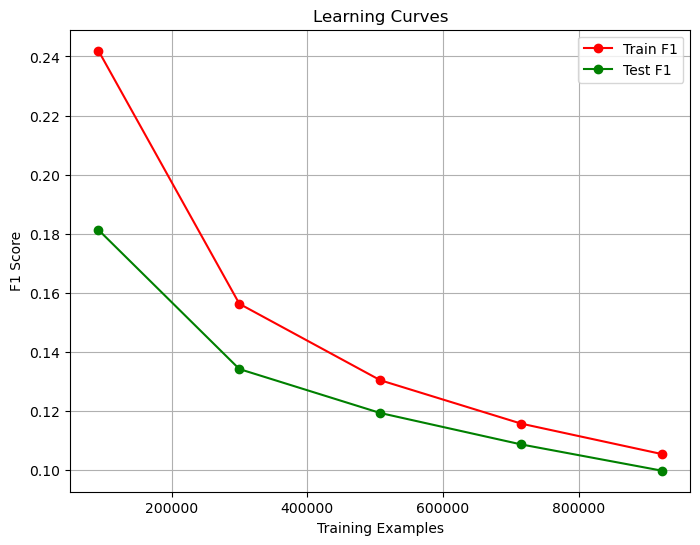

In [174]:
from sklearn.model_selection import learning_curve

# Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    voting_model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Средние и стандартные отклонения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Построение
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train F1')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test F1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

### Стеккинг

In [29]:
# Препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
        ("high_card", TargetEncoder(), high_cardinality),
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

# Пайплайн для базовых моделей
base_models = [
    ('lgbm', imbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1))
    ])),
    ('xgb', imbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", XGBClassifier(**best_params_xgboost, eval_metric="logloss"))
    ])),
    ('catboost', imbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", CatBoostClassifier(**best_params_catboost, verbose=False))
    ]))
]

# Мета-модель
meta_model = LogisticRegression()

# Стекинг
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

# Обучение
stacking_model.fit(X_train, y_train)

# Оценка
y_proba_stacking = stacking_model.predict_proba(X_test)[:, 1]
optimal_threshold_stacking = find_optimal_threshold(y_test, y_proba_stacking)
y_pred_stacking = (y_proba_stacking > optimal_threshold_stacking).astype(int)


print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_stacking):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_stacking):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_stacking):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_stacking):.4f}")
print(f"F1: {f1_score(y_test, y_pred_stacking):.4f}")

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



ROC-AUC: 0.9485
PR-AUC: 0.5379
Precision: 0.2513
Recall: 0.5846
F1: 0.3515


In [105]:
import joblib

# Сохранение модели
joblib.dump(stacking_model, './models/stacking_model.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold_stacking, './models/optimal_threshold_stacking.joblib')

['./models/optimal_threshold_stacking.joblib']

In [ ]:
# Загрузка модели
loaded_model = joblib.load('./models/stacking_model.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/optimal_threshold_stacking.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Catboost на меньшем количестве признаков

#### Обучение

In [92]:
X_train_reduced = X_train.drop(columns=['screen_width', 'screen_height', 'geo_city', 'multiple_sms_errors', 'used_filters', 'retry_attempts', 'error_ratio'])
X_test_reduced = X_test.drop(columns=['screen_width', 'screen_height', 'geo_city', 'multiple_sms_errors', 'used_filters', 'retry_attempts', 'error_ratio'])
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
import optuna

# Список категориальных признаков
categorical_features = [
    "utm_source",
     "utm_medium",
     "traffic_type_cat",
     "device_browser",
     "geo_country",
     #"geo_city"
     ]

# Функция для Optuna
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 50.0, 100.0),
        "random_state": 42,
        "verbose": False,
        "cat_features": categorical_features  # Важно!
    }

    model = CatBoostClassifier(**params)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, y_tr = X_train_reduced.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train_reduced.iloc[val_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=50)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)

        # Логирование метрик
        trial.set_user_attr("roc_auc", roc_auc_score(y_val, y_pred_proba))
        trial.set_user_attr("f1", f1_score(y_val, y_pred))

        f1_scores.append(f1_score(y_val, y_pred))

    return -np.mean(f1_scores)

# Запуск Optuna
study_catboost_reduced = optuna.create_study(direction="minimize")
study_catboost_reduced.optimize(objective, n_trials=2)

# Обучение лучшей модели
best_params_catboost_reduced = study_catboost_reduced.best_params
best_model_catboost_reduced = CatBoostClassifier(**best_params_catboost_reduced, cat_features=categorical_features, verbose=False)
best_model_catboost_reduced.fit(X_train_reduced, y_train)

# Оценка
y_proba_catboost_reduced = best_model_catboost.predict_proba(X_test_reduced)[:, 1]
optimal_threshold_catboost_reduced = find_optimal_threshold(y_test, y_proba_catboost_reduced)
y_pred_catboost_reduced = (y_proba_catboost_reduced > optimal_threshold_catboost_reduced).astype(int)

# Вывод метрик
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_catboost_reduced):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_catboost_reduced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_catboost_reduced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost_reduced):.4f}")
print(f"F1: {f1_score(y_test, y_pred_catboost_reduced):.4f}")

# 7. Визуализации
fig = plot_optimization_history(study_catboost)
fig.show()

fig = plot_param_importances(study_catboost)
fig.show()

[I 2025-05-06 14:16:36,125] A new study created in memory with name: no-name-dae4cad1-8a36-4b47-951d-2c7aa6498791
[I 2025-05-06 14:19:25,973] Trial 0 finished with value: -0.1636494072822087 and parameters: {'iterations': 411, 'depth': 7, 'learning_rate': 0.16679412584204717, 'l2_leaf_reg': 7.861826697867705, 'border_count': 101, 'scale_pos_weight': 71.72078561549982}. Best is trial 0 with value: -0.1636494072822087.
[I 2025-05-06 14:22:01,705] Trial 1 finished with value: -0.1650794439844759 and parameters: {'iterations': 323, 'depth': 4, 'learning_rate': 0.04388050781424627, 'l2_leaf_reg': 1.6127006586492194, 'border_count': 195, 'scale_pos_weight': 50.44331710837858}. Best is trial 1 with value: -0.1650794439844759.


ROC-AUC: 0.9545
PR-AUC: 0.5696
Precision: 0.9470
Recall: 0.4150
F1: 0.5771


In [93]:
import joblib

# Сохранение модели
joblib.dump(best_model_catboost_reduced, './models/best_model_catboost_reduced.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold_catboost_reduced, './models/optimal_threshold_catboost_reduced.joblib')

['./models/optimal_threshold_catboost_reduced.joblib']

In [95]:
# Загрузка модели
loaded_model = joblib.load('./models/best_model_catboost_reduced.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/optimal_threshold_catboost_reduced.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test_reduced)

array([0, 1, 0, ..., 0, 0, 1])

#### Визуализации

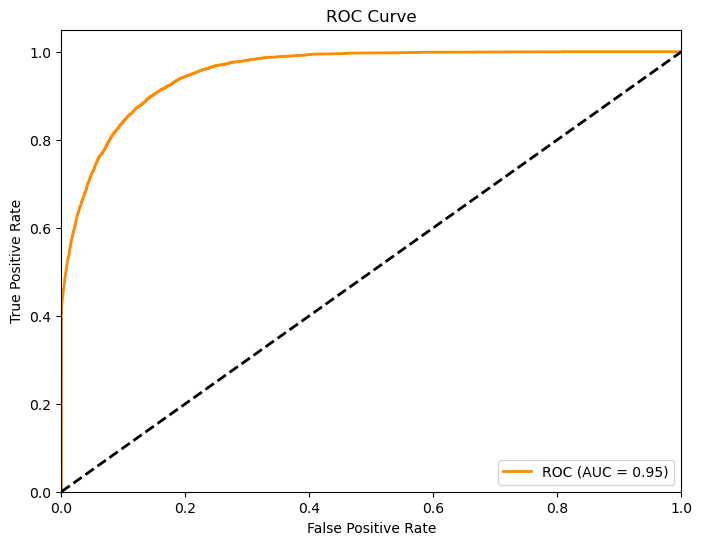

In [97]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_catboost_reduced)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

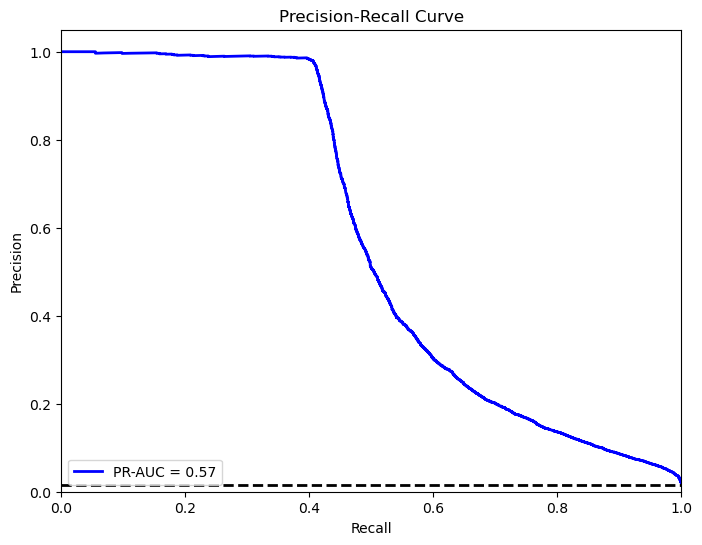

In [98]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_catboost_reduced)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

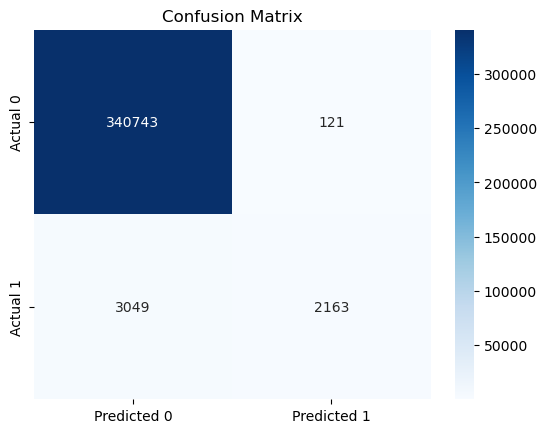

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_catboost_reduced > optimal_threshold_catboost_reduced).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

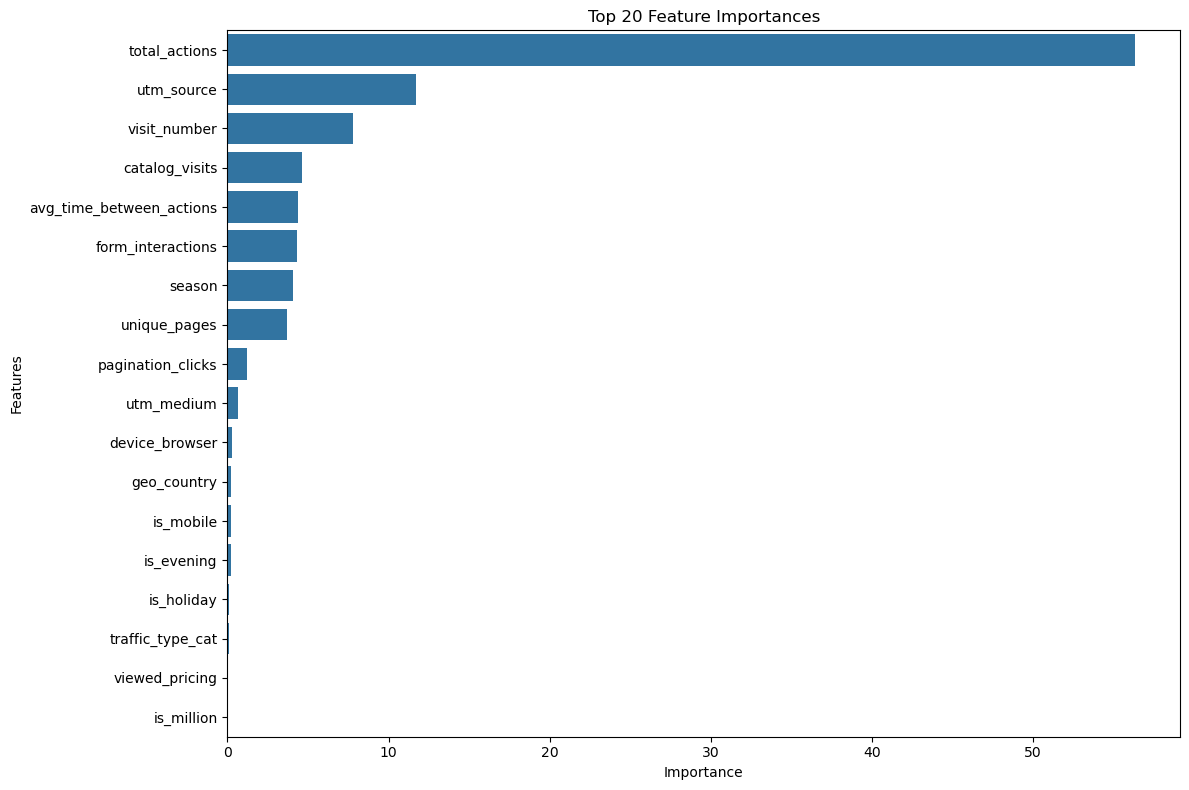

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Получаем важность признаков из обученной модели
feature_importance = best_model_catboost_reduced.get_feature_importance()
feature_names = X_train_reduced.columns

# Создаем DataFrame для визуализации
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Сортируем по важности и берем топ-20 признаков
top_features = feature_df.sort_values('importance', ascending=False).head(20)

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

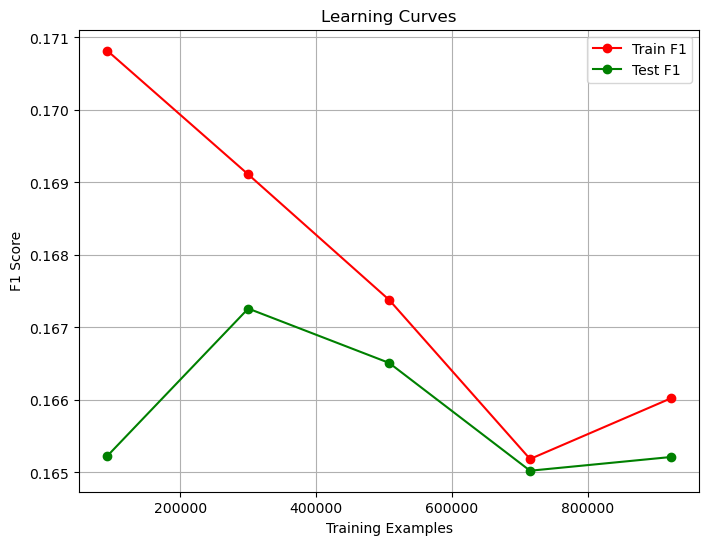

In [104]:
# Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    best_model_catboost_reduced, X_train_reduced, y_train, cv=3, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Средние и стандартные отклонения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Построение
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train F1')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test F1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

In [114]:
# 1. Подготовка данных
X_train_processed = X_train_reduced.copy()
X_test_processed = X_test_reduced.copy()

# 2. Получаем модель напрямую (без named_steps)
model_catboost = best_model_catboost_reduced

# 3. Инициализируем SHAP-объяснитель
explainer = shap.TreeExplainer(model_catboost)

# 4. Вычисляем SHAP-значения
shap_values = explainer.shap_values(X_test_processed)
shap_values_class_1 = shap_values[1]  # Для положительного класса (если задача бинарной классификации)

In [115]:
print("SHAP values shape:", shap_values_class_1.shape)  # Должно быть (n_samples, n_features)
print("X_test shape:", X_test_processed.shape)  

SHAP values shape: (18,)
X_test shape: (346076, 18)


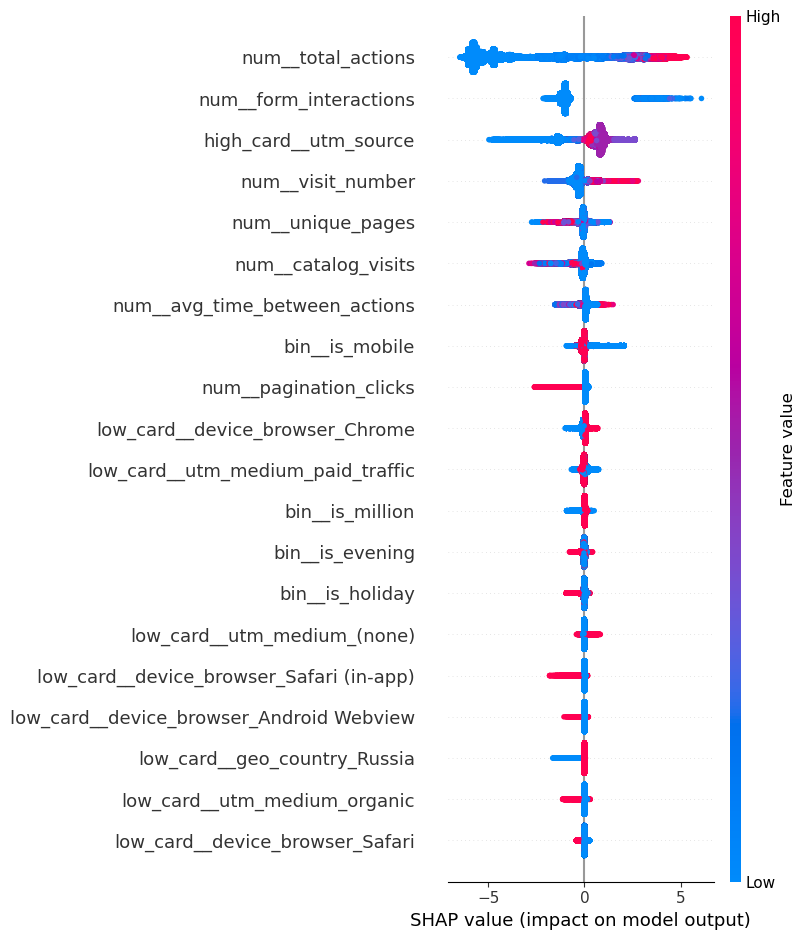

In [ ]:
# Глобальная интерпретация: важность признаков (всё тестовое множество)
shap.summary_plot(
    shap_values, 
    X_test_processed, 
    feature_names=preprocessor.get_feature_names_out()
)

In [122]:
X_test_processed.iloc[0]

visit_number                                   1
utm_source                  ZpYIoDJMcFzVoPFsHGJL
utm_medium                          paid_traffic
device_browser                            Chrome
geo_country                               Russia
is_holiday                                     0
season                                         3
is_mobile                                      1
is_million                                     1
traffic_type_cat                            paid
catalog_visits                                 8
total_actions                                 64
form_interactions                              0
is_evening                                     0
unique_pages                                   2
viewed_pricing                                 0
avg_time_between_actions               10.601714
pagination_clicks                              0
Name: 714548, dtype: object

In [133]:
X_test_processed.columns

Index(['visit_number', 'utm_source', 'utm_medium', 'device_browser',
       'geo_country', 'is_holiday', 'season', 'is_mobile', 'is_million',
       'traffic_type_cat', 'catalog_visits', 'total_actions',
       'form_interactions', 'is_evening', 'unique_pages', 'viewed_pricing',
       'avg_time_between_actions', 'pagination_clicks'],
      dtype='object')

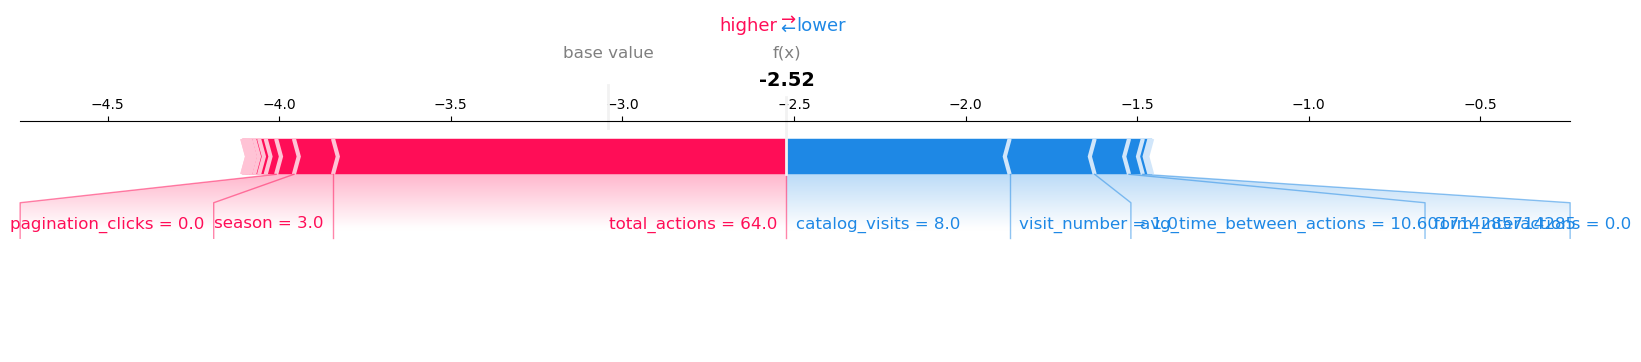

In [134]:
# Локальная интерпретация: влияние признаков на отдельный прогноз (один объект)
idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[idx], 
    X_test_processed.iloc[idx], 
    feature_names=X_test_processed.columns,
    matplotlib=True
)

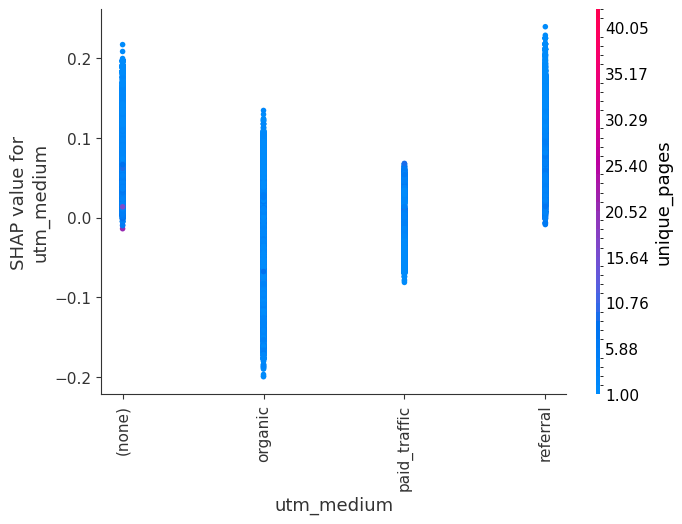

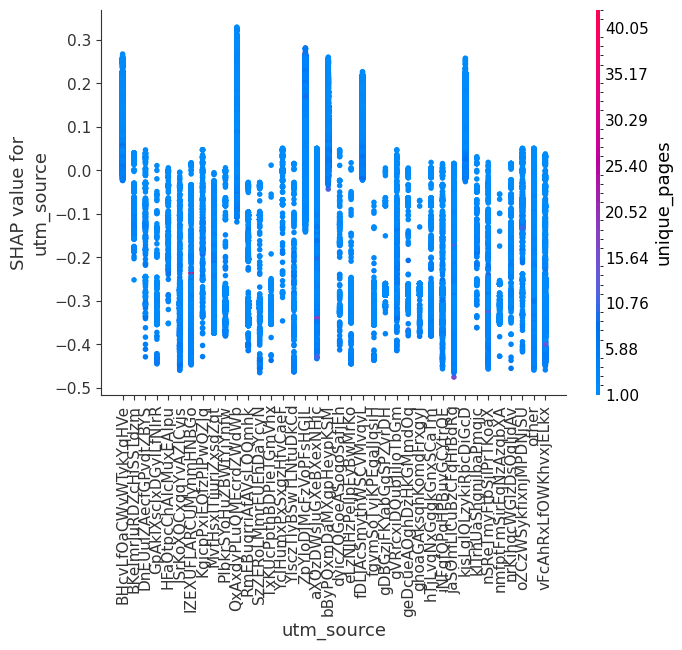

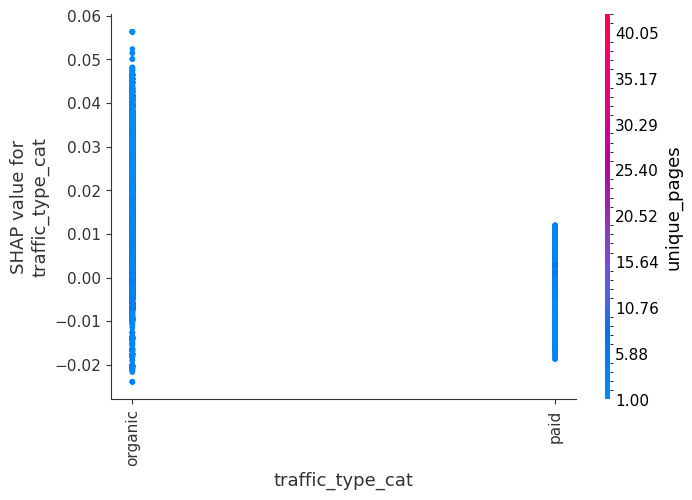

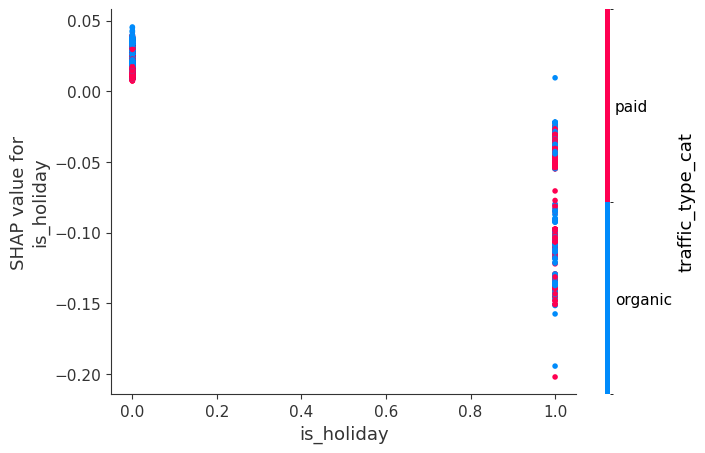

In [138]:
shap.dependence_plot(
    "utm_medium",
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    "utm_source",
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    'traffic_type_cat',
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)
shap.dependence_plot(
    'is_holiday',
    shap_values,
    X_test_processed,
    feature_names=X_test_processed.columns
)


### LightGBM на меньшем количестве признаков

#### Обучение

In [42]:
categorical_features_reduced = [
    #"utm_source_encoded", расскоментить в том случае, если расскоменчен энкодер в ячейке выше
    "utm_source",
    "utm_medium",
    # "utm_campaign", дроп
    # "utm_adcontent", дроп
    # "utm_keyword", дроп
    "device_browser",
    "geo_country",
    "traffic_type_cat",
    # "geo_city"
]
numeric_features_reduced = [
    "visit_number",
    # "session_duration", дроп
    "catalog_visits",
    "total_actions",
    "form_interactions",
    "unique_pages",
    "avg_time_between_actions",
    # "error_ratio",
    "pagination_clicks",
    # "retry_attempts",
    # "screen_width",
    # "screen_height"
]
binary_features_reduced = [
    "is_holiday",
    "is_mobile",
    "is_million",
    "is_evening",
    # "main_to_catalog", дроп
    # "multiple_sms_errors",
    # "used_filters",
    "viewed_pricing"
]
low_cardinality_reduced = ["utm_medium", "traffic_type_cat", "device_browser", "geo_country"]
high_cardinality_reduced = ["utm_source"]

In [44]:
# Препроцессинг


preprocessor = ColumnTransformer(
    transformers=[
        ("low_card", OneHotEncoder(handle_unknown="ignore"), low_cardinality_reduced),
        ("high_card", TargetEncoder(), high_cardinality_reduced),
        ("num", StandardScaler(), numeric_features_reduced),
        ("bin", "passthrough", binary_features_reduced)
    ]
)

# Целевая функция Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 10.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 57.0, 68.0)
    }

    model = imbpipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", LGBMClassifier(**params, random_state=42, verbose=-1))
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []
    cv_scores = []
    for train_idx, val_idx in cv.split(X_train_reduced, y_train):
        X_tr, y_tr = X_train_reduced.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train_reduced.iloc[val_idx], y_train.iloc[val_idx]
        model.fit(X_tr, y_tr)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        pr_auc = average_precision_score(y_val, y_pred_proba)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Логирование метрик
        trial.set_user_attr("roc_auc", roc_auc)
        trial.set_user_attr("pr_auc", pr_auc)
        trial.set_user_attr("precision", precision)
        trial.set_user_attr("recall", recall)
        trial.set_user_attr("f1", f1)
        trial.set_user_attr("f1", f1)
        
        f1_scores.append(f1)
        cv_scores.append(roc_auc)

    return -np.mean(f1_scores)

from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0, 1, 100)
    best_f1 = 0
    best_threshold = 0.5
    for t in thresholds:
        y_pred = (y_proba > t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    return best_threshold

# Запуск Optuna
study_lgbm_reduced = optuna.create_study(direction="minimize")
study_lgbm_reduced.optimize(objective, n_trials=30)

# Лучшая модель
best_params_lgbm_reduced = study_lgbm_reduced.best_params
model_optimized_lgbm_reduced = imbpipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LGBMClassifier(**best_params_lgbm_reduced, random_state=42, verbose=-1))
])
model_optimized_lgbm_reduced.fit(X_train_reduced, y_train)

# Подбор порога
y_proba_lgbm_reduced = model_optimized_lgbm_reduced.predict_proba(X_test_reduced)[:, 1]
optimal_threshold_reduced = find_optimal_threshold(y_test, y_proba_lgbm_reduced)
y_pred_lgbm_reduced = (y_proba_lgbm_reduced > optimal_threshold_reduced).astype(int)

# Вывод метрик
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lgbm_reduced):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_lgbm_reduced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm_reduced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm_reduced):.4f}")
print(f"F1: {f1_score(y_test, y_pred_lgbm_reduced):.4f}")

# Визуализации
fig = plot_optimization_history(study_lgbm_reduced)
fig.show()

fig = plot_param_importances(study_lgbm_reduced)
fig.show()

[I 2025-05-06 12:52:48,008] A new study created in memory with name: no-name-1fd78cdb-b014-4768-8f5d-1ed3c3daf629
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

[I 2025-05-06 12:53:36,539] Trial 0 finished with value: -0.07283004227950536 and parameters: {'n_estimators': 492, 'max_depth': 6, 'learning_rate': 0.16839459407966617, 'num_leaves': 75, 'min_data_in_leaf': 59, 'lambda_l1': 3.805405617175114, 'lambda_l2': 7.133728370109031, 'feature_fraction': 0.852727

ROC-AUC: 0.9452
PR-AUC: 0.5126
Precision: 0.1480
Recall: 0.6660
F1: 0.2422


In [90]:
import joblib

# Сохранение модели
joblib.dump(model_optimized_lgbm_reduced, './models/lgbm_model_reduced.joblib')

# Сохранение оптимального порога
joblib.dump(optimal_threshold_reduced, './models/optimal_threshold_reduced.joblib')

['./models/optimal_threshold_reduced.joblib']

In [91]:
# Загрузка модели
loaded_model = joblib.load('./models/lgbm_model_reduced.joblib')

# Загрузка порога
loaded_threshold = joblib.load('./models/optimal_threshold_reduced.joblib')

# Тестирование загруженной модели
loaded_model.predict(X_test_reduced)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

#### Визуализации

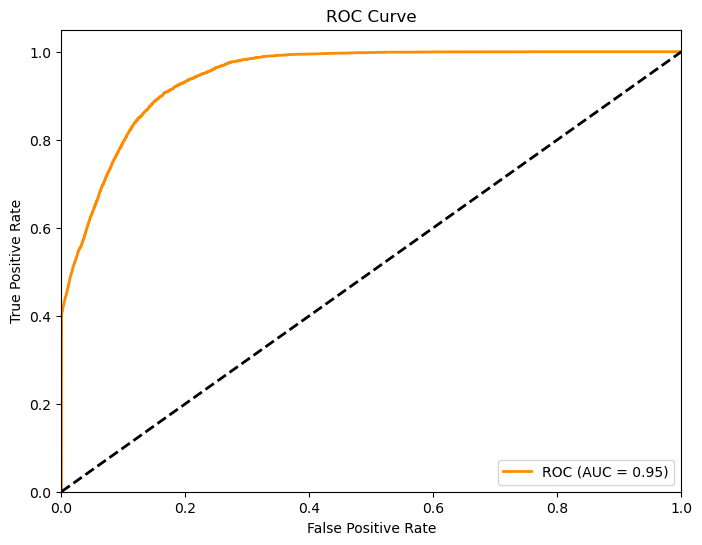

In [46]:
from sklearn.metrics import roc_curve, auc

# Расчёт ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lgbm_reduced)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

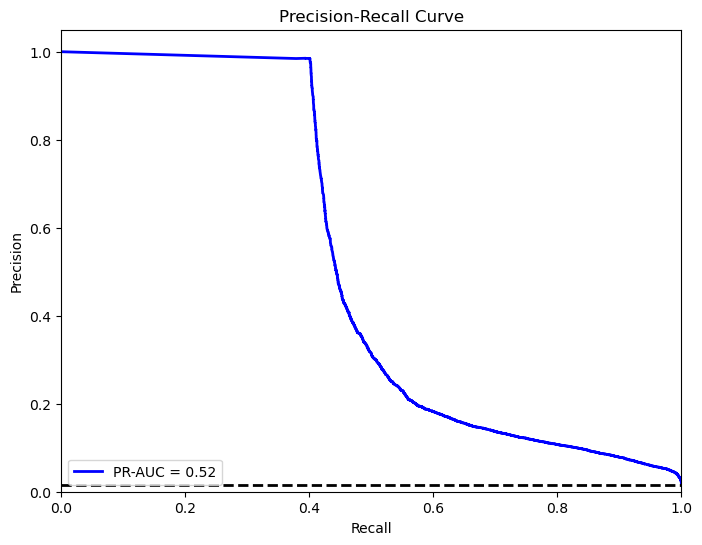

In [47]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lgbm_reduced)
pr_auc = auc(recall, precision)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], 'k--', lw=2)  # Базовая линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

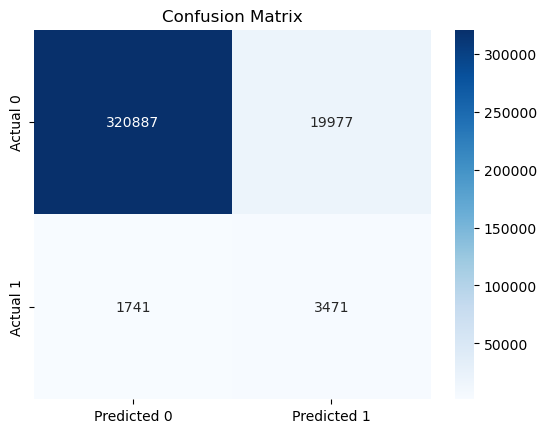

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Используем оптимальный порог, найденный ранее
y_pred = (y_proba_lgbm_reduced > optimal_threshold).astype(int)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

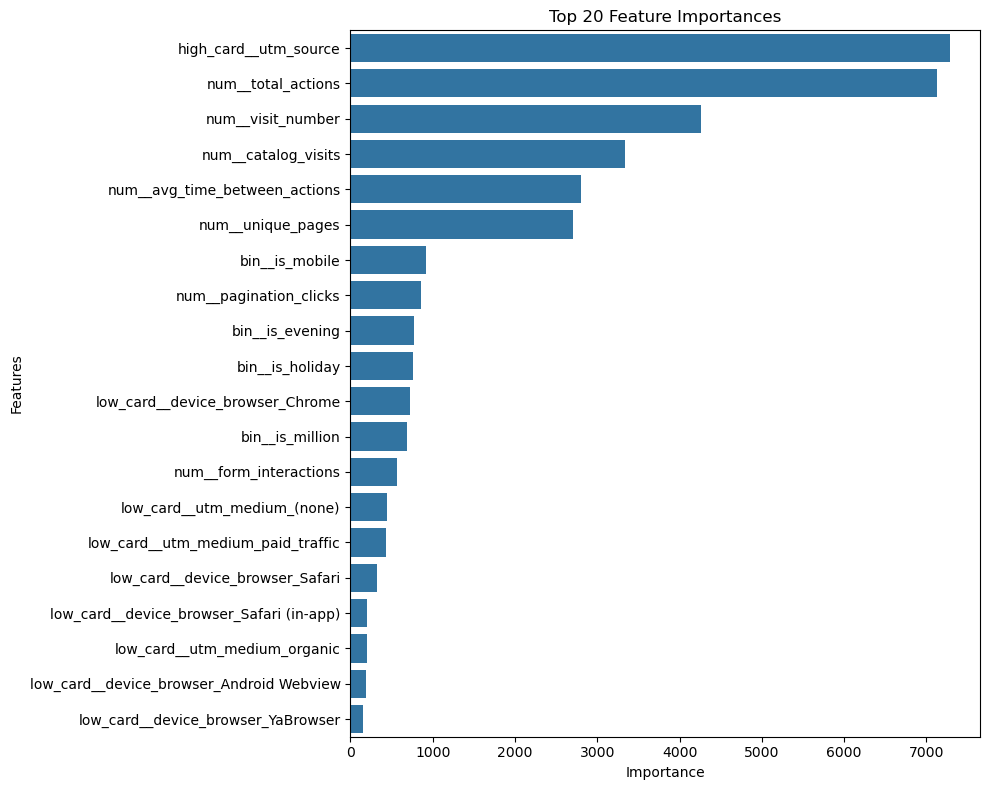

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Получение имен признаков после препроцессинга
feature_names = preprocessor.get_feature_names_out()

# Получение важности признаков из обученной модели
importances = model_optimized_lgbm_reduced.named_steps['classifier'].feature_importances_

# Создание DataFrame с важностью признаков
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Визуализация топ-20 самых важных признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier wa

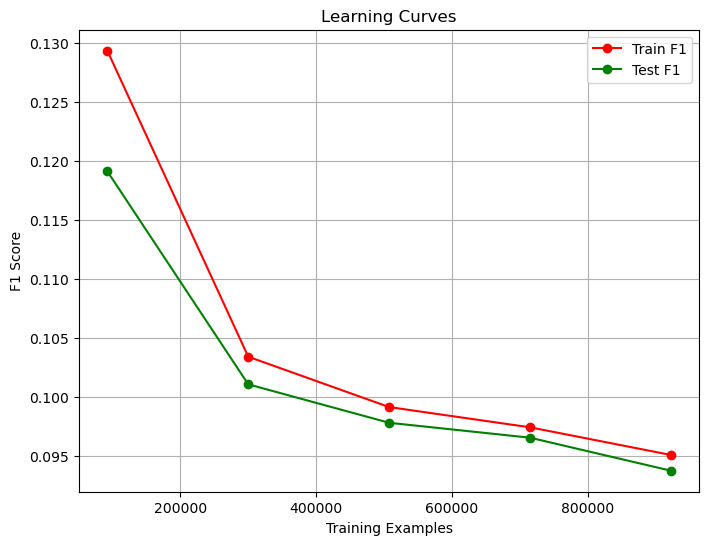

In [54]:
from sklearn.model_selection import learning_curve

# Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    model_optimized_lgbm_reduced, X_train_reduced, y_train, cv=3, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Средние и стандартные отклонения
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Построение
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train F1')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test F1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

In [55]:
import shap

# Используем данные после препроцессинга
X_train_processed = preprocessor.transform(X_train_reduced)
X_test_processed = preprocessor.transform(X_test_reduced)

# Получаем доступ к обученной модели LGBM (без SMOTE)
model_lgbm = model_optimized_lgbm_reduced.named_steps['classifier']
# Создаем объясняющий объект
explainer = shap.TreeExplainer(model_lgbm)

# Вычисляем SHAP-значения для тестовой выборки
shap_values = explainer.shap_values(X_test_processed)

# Если задача бинарной классификации, shap_values будет списком из двух элементов:
# shap_values[0] — для класса 0, shap_values[1] — для класса 1
# Используем второй класс (положительный)
shap_values_class_1 = shap_values[1]

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/shap/explainers/_tree.py:583: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



In [63]:
print("SHAP values shape:", shap_values_class_1.shape)  # Должно быть (n_samples, n_features)
print("X_test shape:", X_test_processed.shape)  

SHAP values shape: (37,)
X_test shape: (346076, 37)


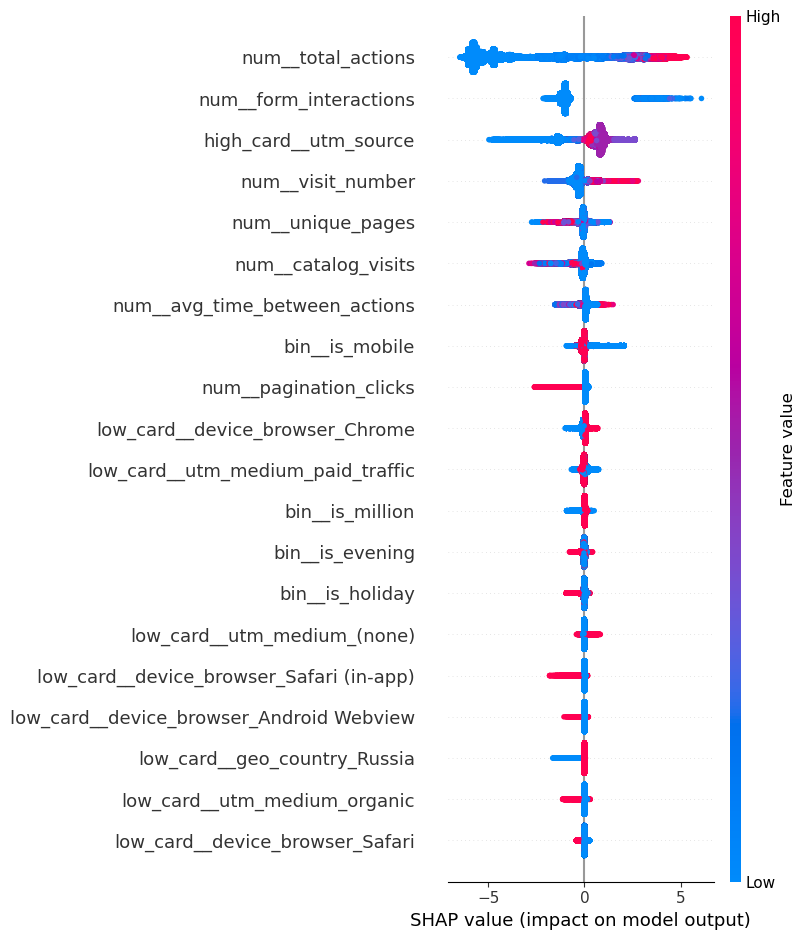

In [65]:
# Глобальная интерпретация: важность признаков (всё тестовое множество)
shap.summary_plot(
    shap_values, 
    X_test_processed, 
    feature_names=preprocessor.get_feature_names_out()
)

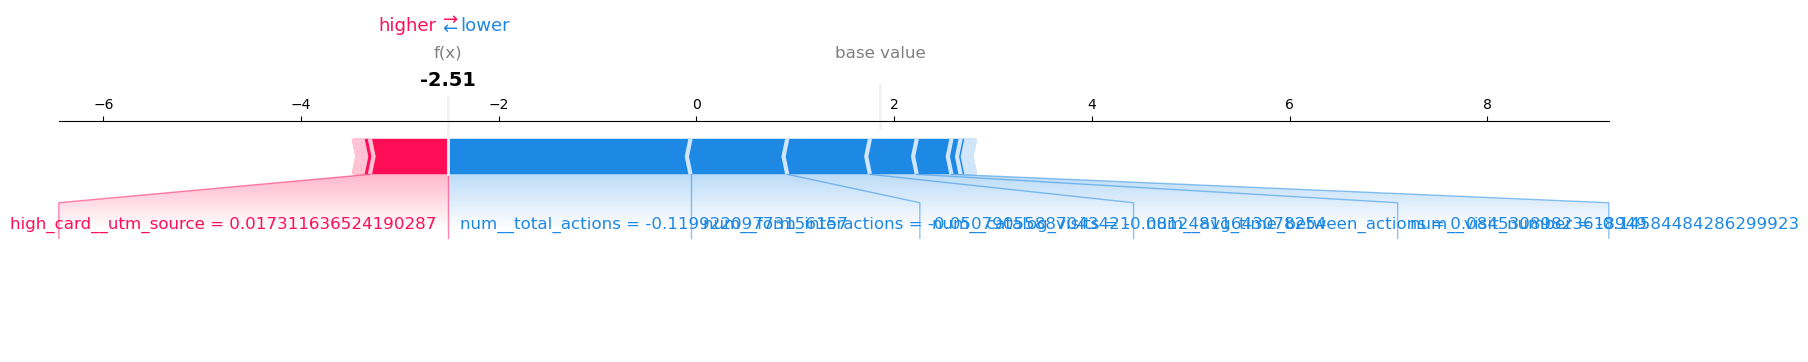

In [74]:
# Локальная интерпретация: влияние признаков на отдельный прогноз (один объект)
idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[idx], 
    X_test_processed[idx], 
    feature_names=preprocessor.get_feature_names_out(),
    matplotlib=True
)

In [81]:
preprocessor.get_feature_names_out()

array(['low_card__utm_medium_(none)', 'low_card__utm_medium_organic',
       'low_card__utm_medium_paid_traffic',
       'low_card__utm_medium_referral',
       'low_card__traffic_type_cat_organic',
       'low_card__traffic_type_cat_paid',
       'low_card__device_browser_Android Webview',
       'low_card__device_browser_Chrome', 'low_card__device_browser_Edge',
       'low_card__device_browser_Firefox',
       'low_card__device_browser_Opera',
       'low_card__device_browser_Safari',
       'low_card__device_browser_Safari (in-app)',
       'low_card__device_browser_Samsung Internet',
       'low_card__device_browser_YaBrowser',
       'low_card__device_browser_other',
       'low_card__geo_country_(not set)', 'low_card__geo_country_Belarus',
       'low_card__geo_country_Ireland', 'low_card__geo_country_Russia',
       'low_card__geo_country_Sweden', 'low_card__geo_country_Ukraine',
       'low_card__geo_country_United States',
       'low_card__geo_country_other', 'high_card__utm

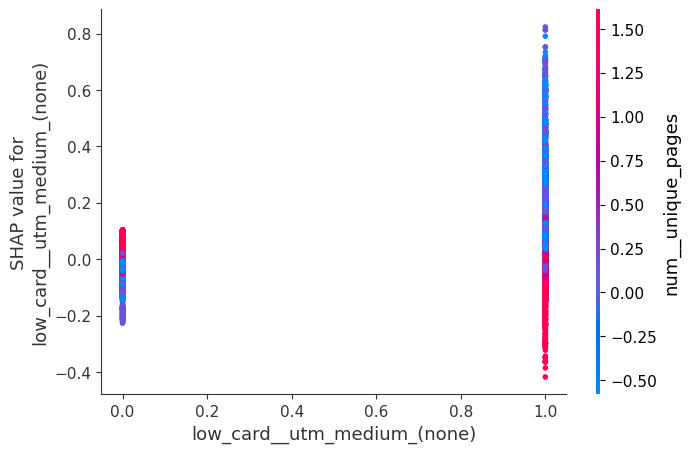

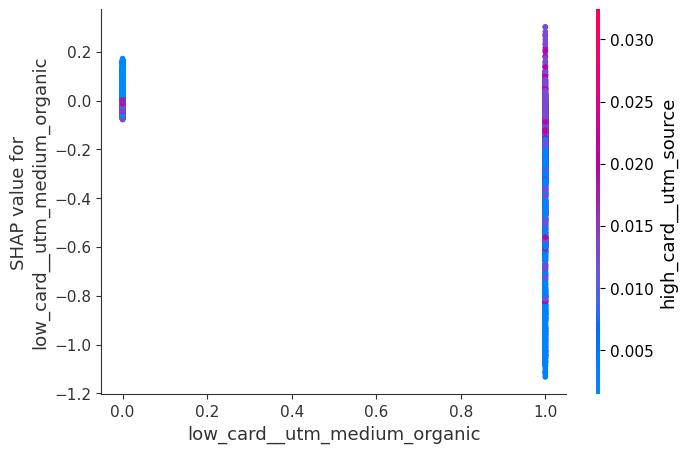

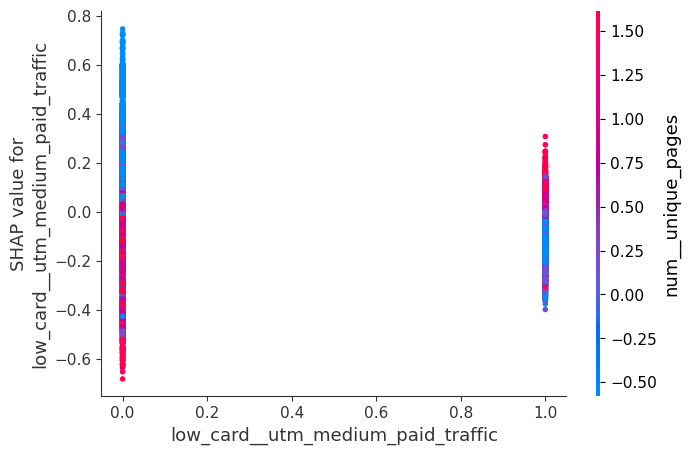

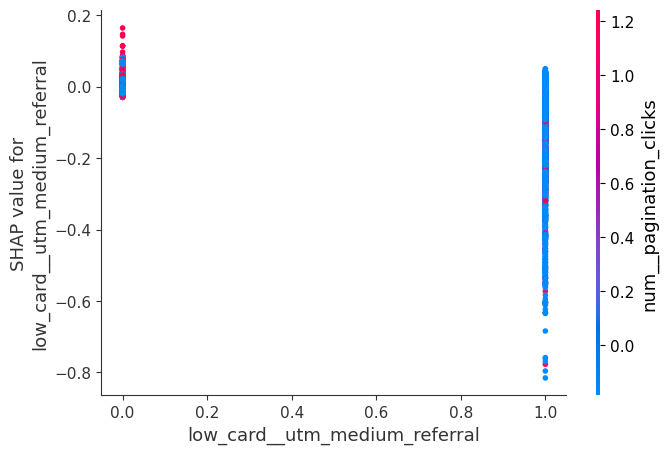

In [86]:
shap.dependence_plot(
    "low_card__utm_medium_(none)",
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_organic',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_paid_traffic',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
shap.dependence_plot(
    'low_card__utm_medium_referral',
    shap_values,
    X_test_processed,
    feature_names=preprocessor.get_feature_names_out()
)
